## Exercise 1

a, b, c)

In [1]:
 import pandas as pd
 import duckdb
 
 df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")
 df

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Woonsocket,Rhode Island,5,"12,518",1.0,15.0,NaN,1,52,64,...,131,8.0,NaN,45,7,25,7,2,NaN,1.0
157,Worcester,Massachusetts,10,"37,652",1.0,192.0,11,12,103,20,...,714,8.0,2,"7,542",21,614,40,38,55.0,4.0
158,Yonkers,New York,65,"14,634",2.0,26.0,4,7,"1,032",6,...,572,2.0,2,289,75,18,45,19,4.0,9.0
159,York,Pennsylvania,5,"1,304",2.0,2.0,NaN,NaN,64,1,...,25,NaN,1,10,18,1,7,1,NaN,1.0


In [2]:
df = df.fillna("0")

In [3]:
df.columns

Index(['City', 'State', 'Error', 'Total foreign born', 'Africa',
       'Asia (except China, Japan, and India)', 'Atlantic Islands',
       'Australia', 'Austria', 'Belgium', 'Bohemia', 'Canada (English)',
       'Canada (French)', 'Central America', 'China', 'Cuba', 'Denmark',
       'England', 'Europe (not otherwise specified)', 'Finland', 'France',
       'Germany', 'Greece', 'Holland', 'Hungary', 'India', 'Ireland', 'Italy',
       'Japan', 'Luxemburg', 'Mexico', 'Norway',
       'Pacific Islands (except Phillipine Islands)', 'Poland (Austrian)',
       'Poland (German)', 'Poland (Russian)', 'Poland (unknown)', 'Portugal',
       'Roumania', 'Russia', 'Scotland', 'South America', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Wales',
       'West Indies (except Cuba and Puerto Rico)', 'Other countries',
       'Born at sea'],
      dtype='object')

In [4]:
columns_to_change_type = ["Denmark", "Sweden", "Norway", "Finland", "Total foreign born"]
df[columns_to_change_type].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Denmark             161 non-null    object
 1   Sweden              161 non-null    object
 2   Norway              161 non-null    object
 3   Finland             161 non-null    object
 4   Total foreign born  161 non-null    object
dtypes: object(5)
memory usage: 6.4+ KB


In [5]:
for column in columns_to_change_type:
    df[column] = df[column].str.replace(",", "").astype(int)
    
df[columns_to_change_type].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Denmark             161 non-null    int64
 1   Sweden              161 non-null    int64
 2   Norway              161 non-null    int64
 3   Finland             161 non-null    int64
 4   Total foreign born  161 non-null    int64
dtypes: int64(5)
memory usage: 6.4 KB


In [6]:
df_nordic = duckdb.query(
    """--sql     
        WITH nordic AS (
        FROM df 
            SELECT 
                state, 
                SUM("Total foreign born") as "Total foreigners", 
                SUM("Sweden") as Swedes, 
                SUM("Norway") as Norwegians, 
                SUM("Denmark") as Danish, 
                SUM("Finland") as Finnish, 
            GROUP BY
                state
        )
        FROM nordic n
        SELECT 
            *,
            n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
        ORDER BY 
            nordic
        DESC
             """
).df() # The second to create another column called Nordic

df_nordic.head()

,State,Total foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0


In [7]:
top_3_nordic = ( df_nordic.drop(["Nordic", "Total foreigners"], axis=1).set_index("State").head(3)
)

top_3_nordic

,Swedes,Norwegians,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


<Axes: title={'left': 'Annotate with arrows'}, xlabel='State', ylabel='Number of foreigners'>

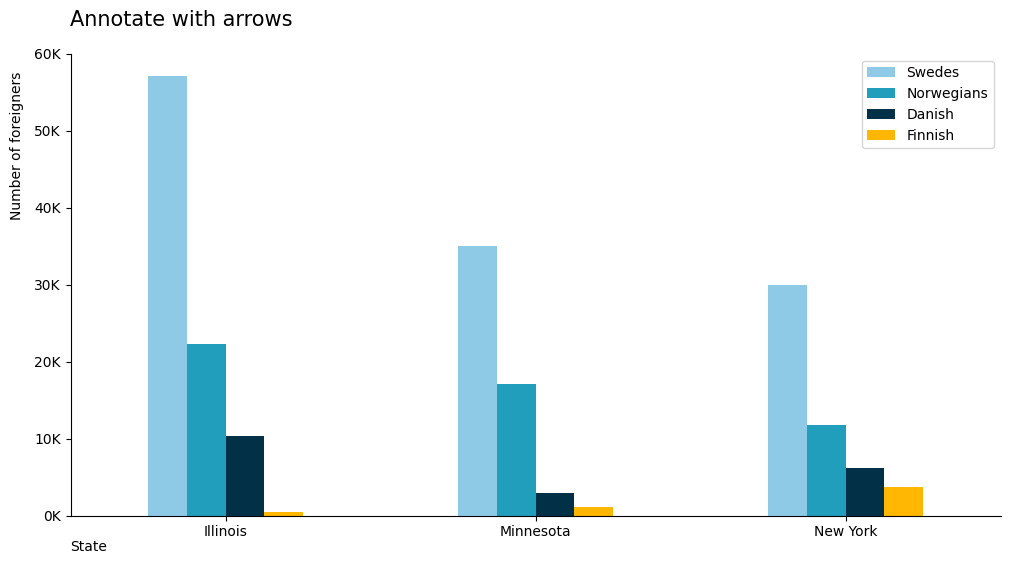

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from constants import blue_1, blue_2, dark_blue, orange_1, orange_2
custom_colors = [blue_1, blue_2, dark_blue, orange_1]


def nordic_plot():
    ax = top_3_nordic.plot(kind = "bar", figsize=(12,6), color=custom_colors)
    ax.set_xticklabels(top_3_nordic.index, rotation = 0)
    ax.spines[["top", "right"]].set_visible(False)
    
    ax.set_title("Annotate with arrows", loc = "left", pad = 20, fontsize = 15)
    
    ax.set_xlabel("State", loc = "left", labelpad=0.5)
    ax.set_ylabel("Number of foreigners", labelpad=0.5)
    ax.yaxis.set_label_coords(-0.05, 0.8)
    
    formatter = FuncFormatter(lambda x,_: f"{int(x/1000)}K")
    ax.yaxis.set_major_formatter(formatter)
    
    return ax

ax = nordic_plot()

ax


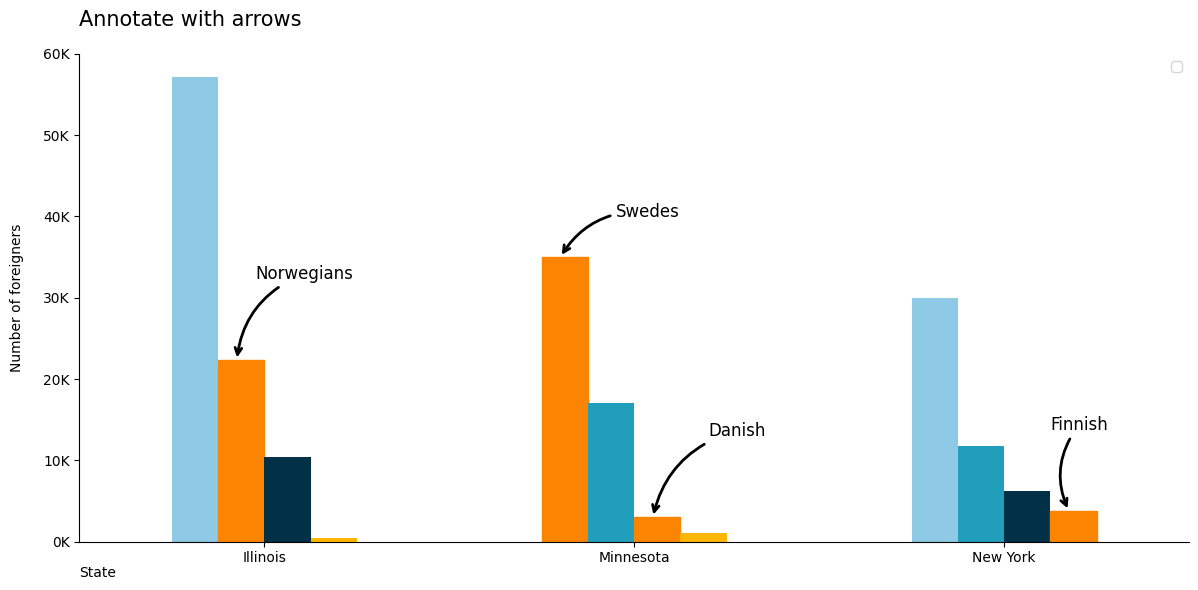

In [9]:





ax = nordic_plot()


# Tuple unpacking of ax.containers that is a ist of four barcontainers, which contains 3 artists each

swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers

# Highlight the bars being annotated
swede_bars[1].set_color(orange_2)
norwegian_bars[0].set_color(orange_2)
finnish_bars[2].set_color(orange_2)
danish_bars[1].set_color(orange_2)


def annotate_nordic(bar_artist, text, x_offset=0.3, y_offset=5000):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    # ternary statement
    rad = -0.3 if x_offset < 0 else 0.3

    arrowprops = dict(arrowstyle="->", connectionstyle=f"arc3, rad={rad}", linewidth=2)

    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
        arrowprops=arrowprops,
        fontsize=12,
    )

annotate_nordic(swede_bars[1], "Swedes", x_offset=0.2, y_offset=5000)
annotate_nordic(norwegian_bars[0], "Norwegians", x_offset=0.1, y_offset=10000)
annotate_nordic(finnish_bars[2], "Finnish", x_offset=0, y_offset=10000)
annotate_nordic(danish_bars[1], "Danish", x_offset=0.2, y_offset=10000)

ax.set(ylabel="Number of foreigners")
ax.legend("")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/arrow_annotations.png")

d-e)

In [10]:
df.columns

Index(['City', 'State', 'Error', 'Total foreign born', 'Africa',
       'Asia (except China, Japan, and India)', 'Atlantic Islands',
       'Australia', 'Austria', 'Belgium', 'Bohemia', 'Canada (English)',
       'Canada (French)', 'Central America', 'China', 'Cuba', 'Denmark',
       'England', 'Europe (not otherwise specified)', 'Finland', 'France',
       'Germany', 'Greece', 'Holland', 'Hungary', 'India', 'Ireland', 'Italy',
       'Japan', 'Luxemburg', 'Mexico', 'Norway',
       'Pacific Islands (except Phillipine Islands)', 'Poland (Austrian)',
       'Poland (German)', 'Poland (Russian)', 'Poland (unknown)', 'Portugal',
       'Roumania', 'Russia', 'Scotland', 'South America', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Wales',
       'West Indies (except Cuba and Puerto Rico)', 'Other countries',
       'Born at sea'],
      dtype='object')

In [11]:
df["Born at sea"] = pd.to_numeric(df["Born at sea"], errors="coerce")

top5_sea = df.nlargest(5, "Born at sea")


top5_sea[["City", "Born at sea"]]



,City,Born at sea
98,New York,447.0
27,Chicago,315.0
107,Philadelphia,177.0
122,St. Louis,132.0
14,Boston,111.0


In [12]:
df_sea = duckdb.query(
    """--sql     
        
        FROM top5_sea
            SELECT 
                "City",
                "Born at sea"
            GROUP BY
                "City", "Born at sea"
             """
)

df_sea =df_sea.df()


In [13]:
plt.style.use("styles/base_erik.mplstyle")

Bad value in file 'styles/base_erik.mplstyle', line 30 ("axes.prop_cycle : cycler('color', ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)


C:\Users\eriku\AppData\Local\Temp\ipykernel_10704\746514273.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


<Axes: xlabel='City', ylabel='Number of immigrants born at sea'>

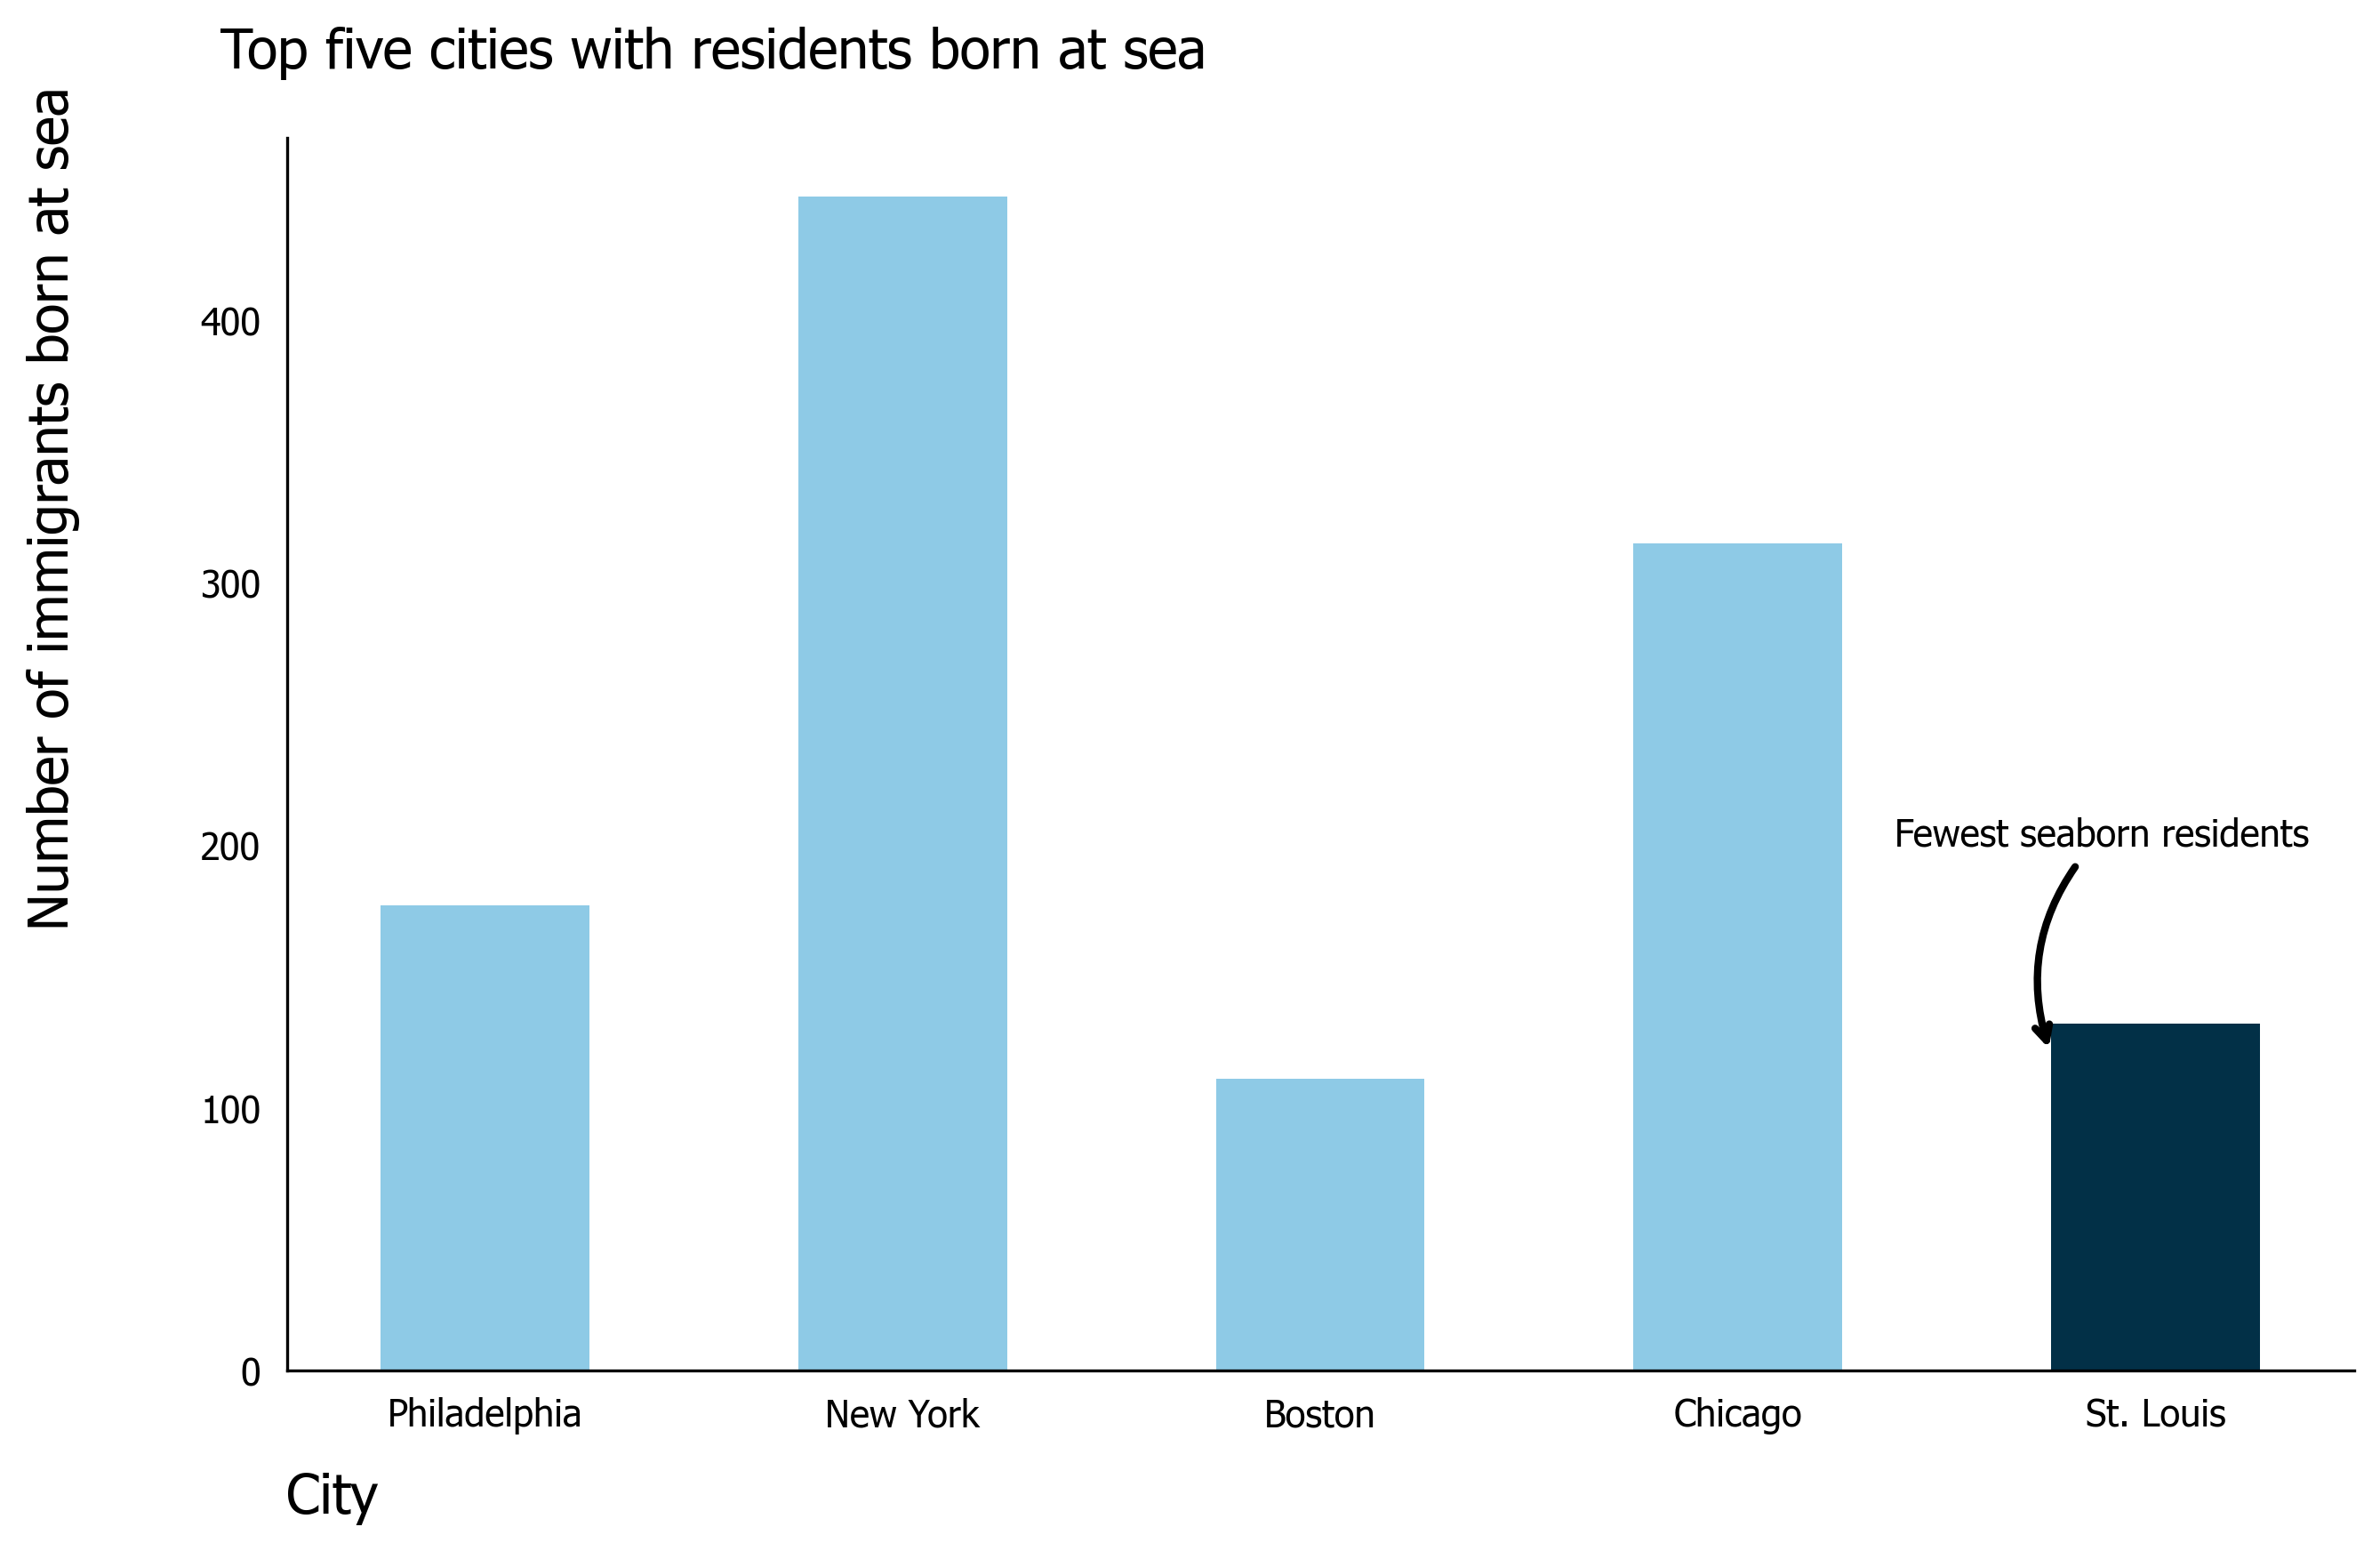

In [14]:
import matplotlib.pyplot as plt
import numpy as np

custom_colors = [blue_1]*len(df_sea)
custom_colors[4] = dark_blue

df_sea = df_sea.set_index("City")

def sea_plot():
    fig, ax = plt.subplots() 
    
    # För att få bredden mellan pelarna
    x = np.arange(len(df_sea)) * 0.8

    ax.bar(x, df_sea["Born at sea"], width=0.4, color=custom_colors)

    ax.set_xticks(x)
    ax.set_xticklabels(df_sea.index, rotation=0)

    fig.suptitle(
        "Top five cities with residents born at sea",
        x=0.1,
        y=0.95,
        ha="left",
        fontsize=15, 
    )

    ax.set_xlabel("City", loc="left")
    ax.set_ylabel("Number of immigrants born at sea")
    ax.yaxis.set_label_coords(-0.1, 0.7)

    ax.legend().remove()
    
        
    arrowprops = dict(arrowstyle= "->", connectionstyle="arc3, rad=0.3", linewidth=2)
    ax.annotate(
    text="Fewest seaborn residents", 
    xy=(3, 120), # ger pilen
    arrowprops=arrowprops, 
    xytext=(2.7, 200), # ger texten
    fontsize=10,)
    


    return ax

ax = sea_plot()
ax


1) Makeover

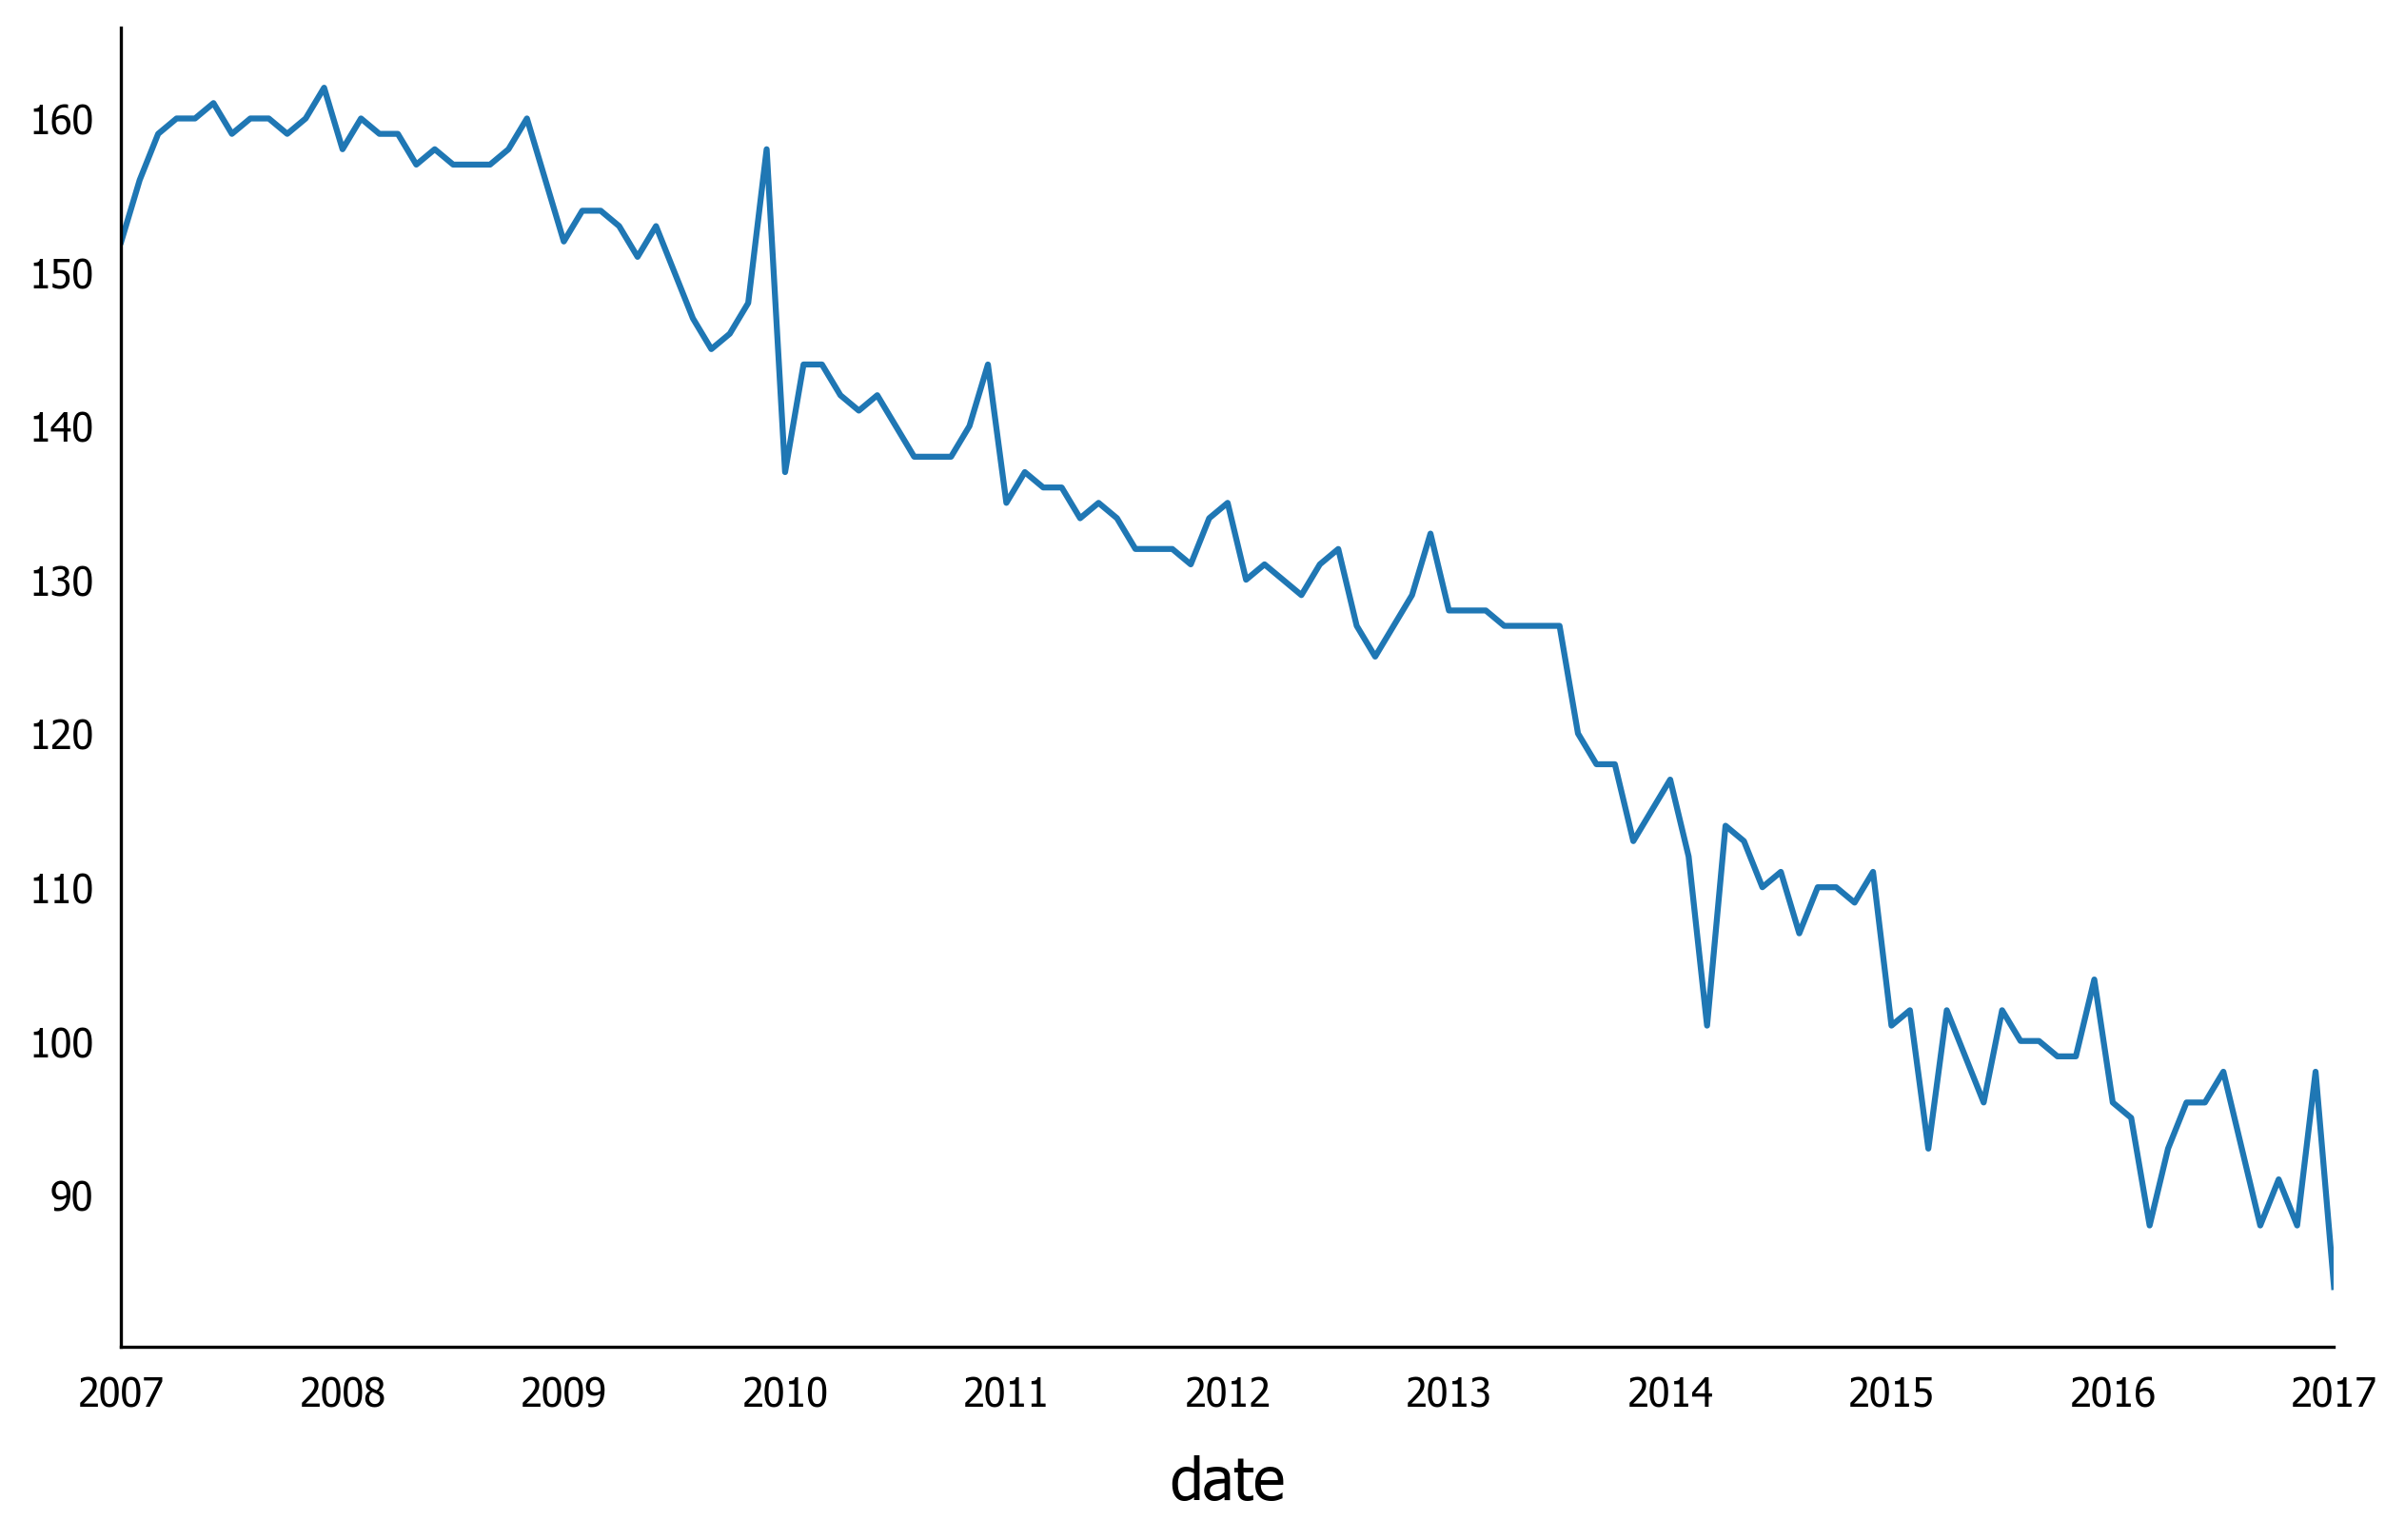

In [15]:
import pandas as pd
import duckdb



df = pd.read_csv("data/norway_new_car_sales_by_month.csv")
df = duckdb.query(
    """
    SELECT avg_CO2, import,quantity, year, month
    FROM df

"""
).df()

df["date"] = pd.to_datetime(
    df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
)

df = df.set_index("date")

ax = df["Avg_CO2"].plot()

In [16]:
print(df.columns)


Index(['Avg_CO2', 'Import', 'Quantity', 'Year', 'Month'], dtype='object')


Bad value in file 'styles/base_erik.mplstyle', line 30 ("axes.prop_cycle : cycler('color', ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)


<Axes: title={'center': 'Average CO2 emissions between years'}, xlabel='Years', ylabel='CO$_2$ Emission levels'>

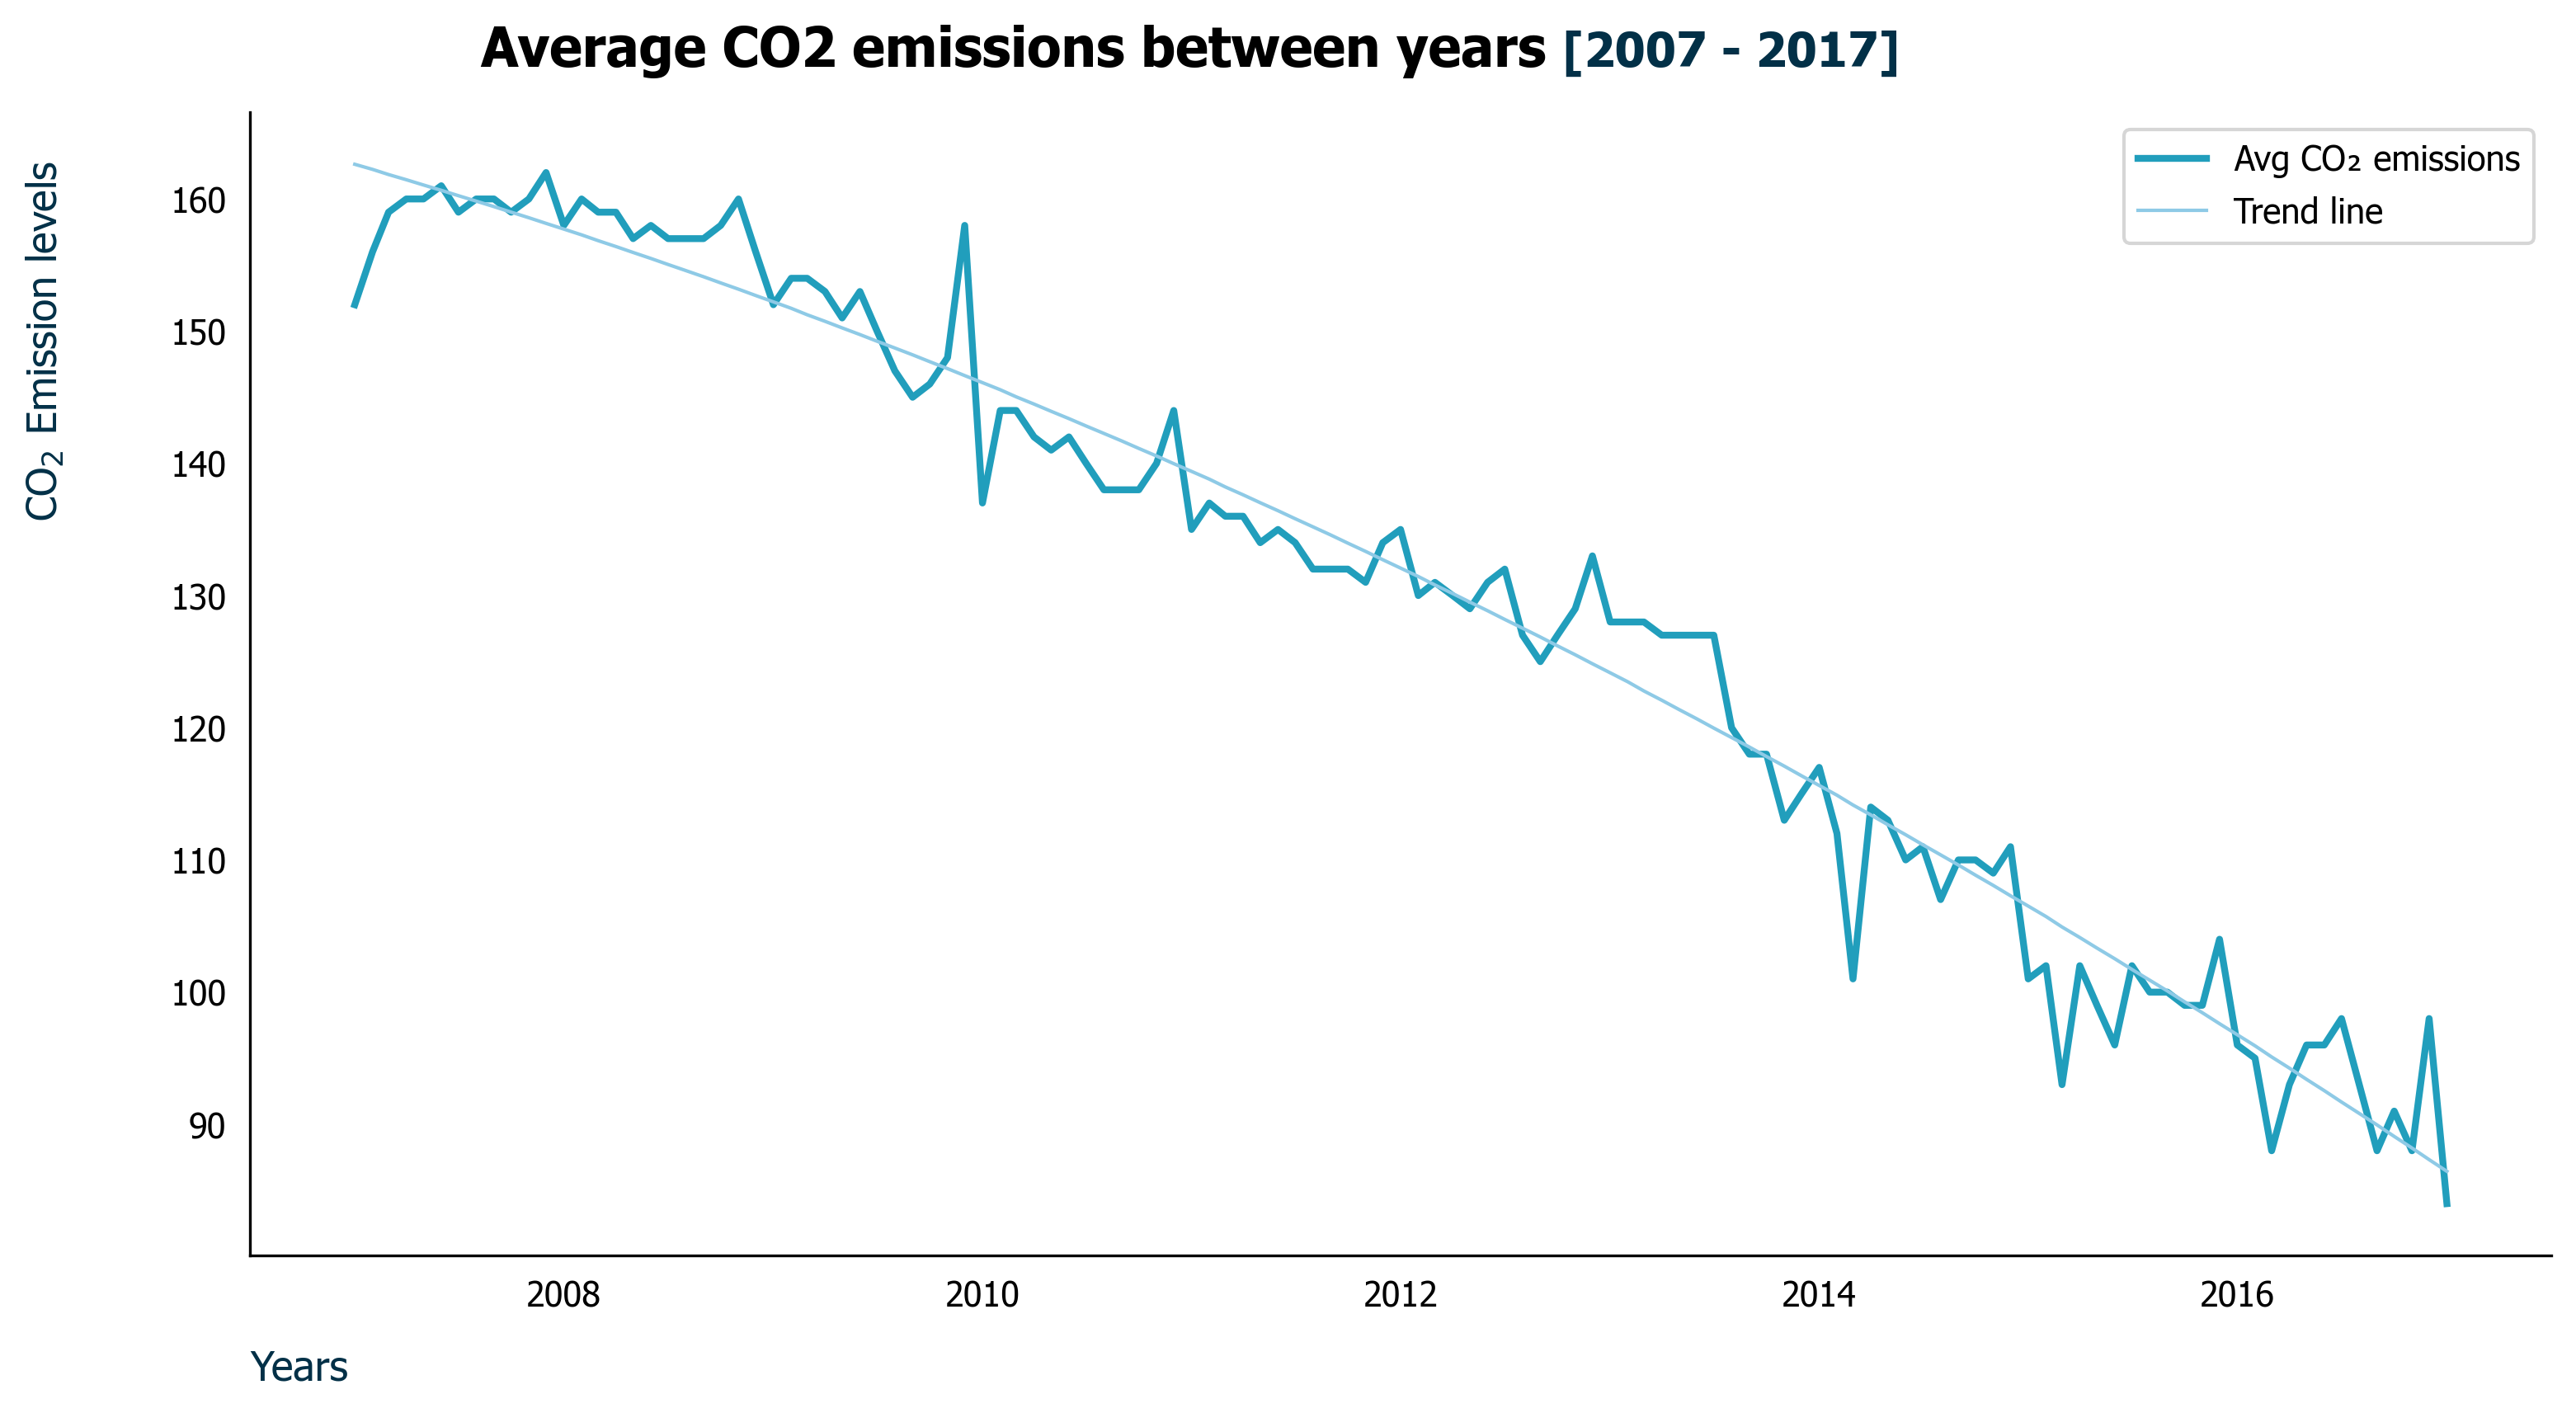

In [17]:
import matplotlib.pyplot as plt

plt.style.use("styles/base_erik.mplstyle")

# (Assume df is already loaded with datetime index)

def avgco2_plot():
    fig, ax = plt.subplots(figsize=(12,6))

    # Plot the line
    ax.plot(df.index, df["Avg_CO2"], color="#219EBC", linewidth=2, label="Avg CO₂ emissions")

    # Set the main title
    ax.set_title(
        "Average CO2 emissions between years",
        x=0.1,
        y=0.95,
        ha="left",
        fontsize=16,
        fontweight="bold",
        pad= 30
    )

    # Add [2007 - 2017] manually
    ax.text(
        0.57, 1.04, "[2007 - 2017]",
        transform=ax.transAxes,
        color="#023047",    
        fontsize=14,
        fontweight="bold",
        ha="left"
    )

    # Axis labels
    ax.set_xlabel("Years", loc="left", fontsize=12, color="#023047")
    ax.set_ylabel("CO$_2$ Emission levels", fontsize=12, color="#023047")
    ax.yaxis.set_label_coords(-0.08, 0.8)
    
    
    # Create a trendline
    
    x = np.arange(len(df))  
    y = df["Avg_CO2"].values
    
    # Fit a linear trend line
    coeffs = np.polyfit(x, y, deg=2) # Find the curve that fits your data
    trend = np.polyval(coeffs, x) #Calculate what the curve looks like
    
    ax.plot(df.index, trend, label="Trend line", color="#8ECAE6", linewidth = 1)
    
    ax.legend()

  
    return ax


ax = avgco2_plot()
ax


2. CO2 data storytelling

<Axes: xlabel='year'>

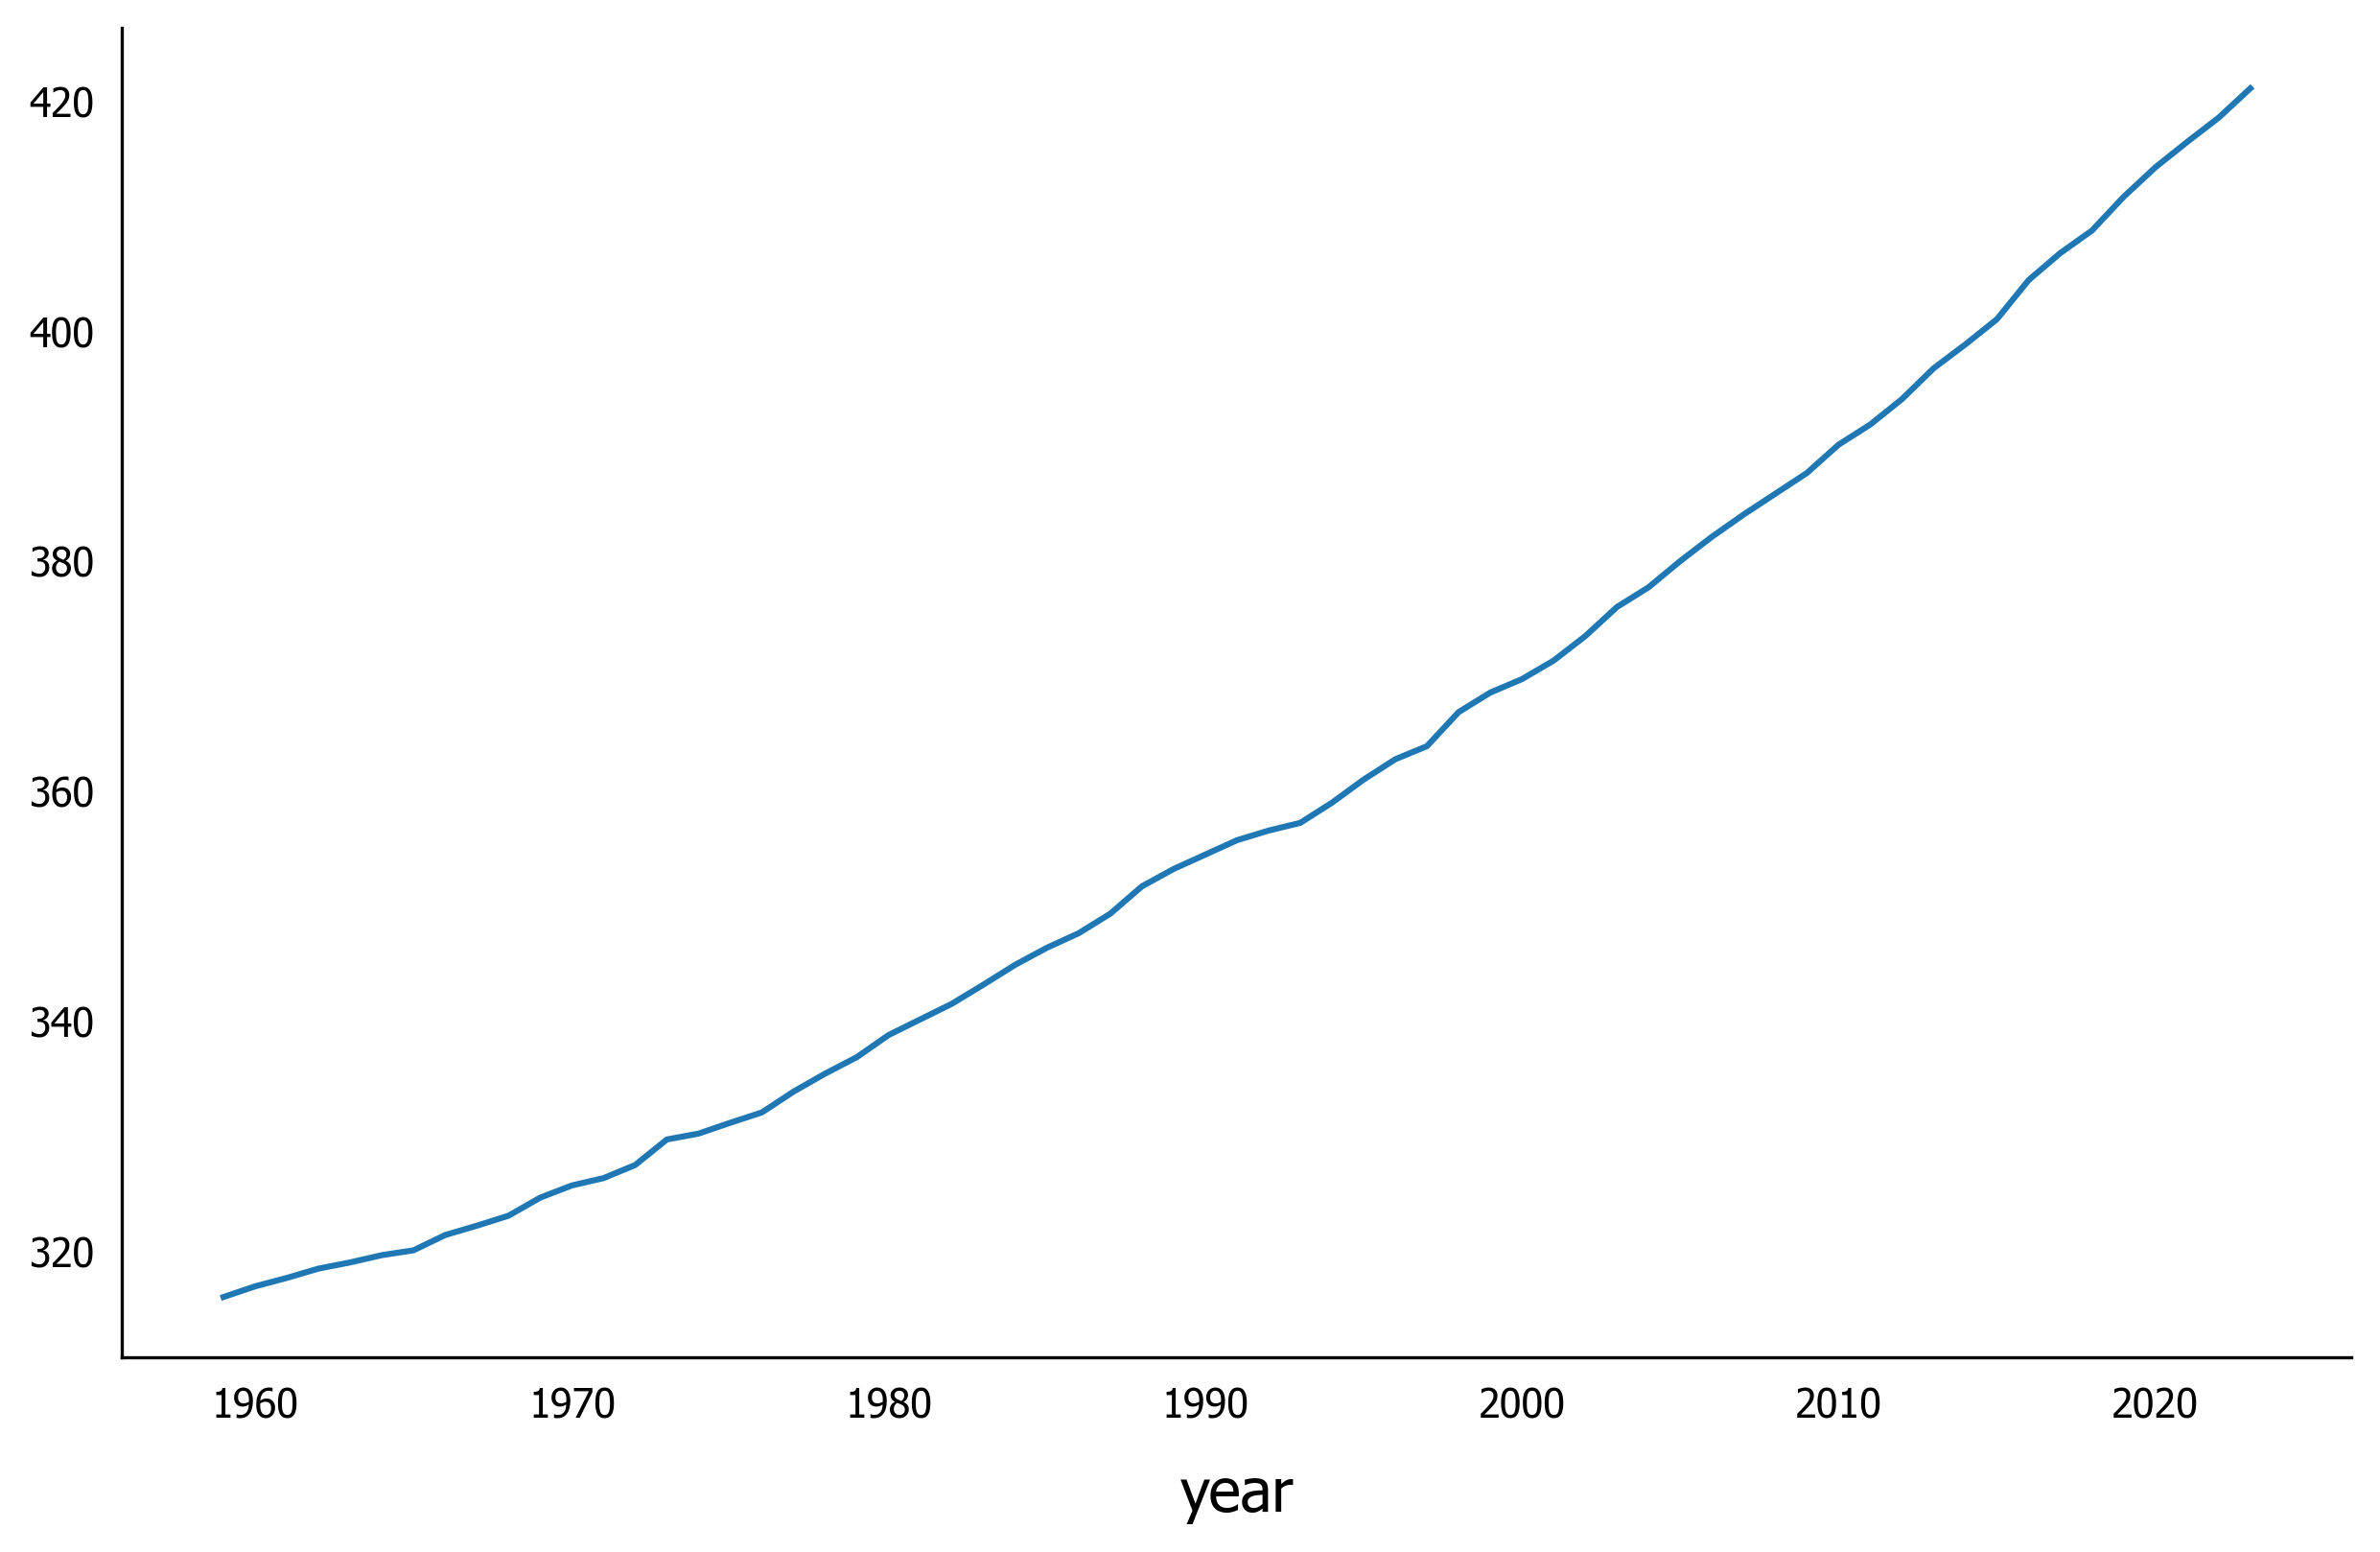

In [18]:
import pandas as pd
import duckdb

df = pd.read_csv("data/co2_annmean_mlo.csv", comment="#")

df = duckdb.query(
    """--sql
  SELECT year, mean
FROM df
ORDER BY year
"""
).df()

# df["date"] = pd.to_datetime(
#     df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2), format="%Y-%m"
# )

df = df.set_index("year")

ax = df["mean"].plot()

ax

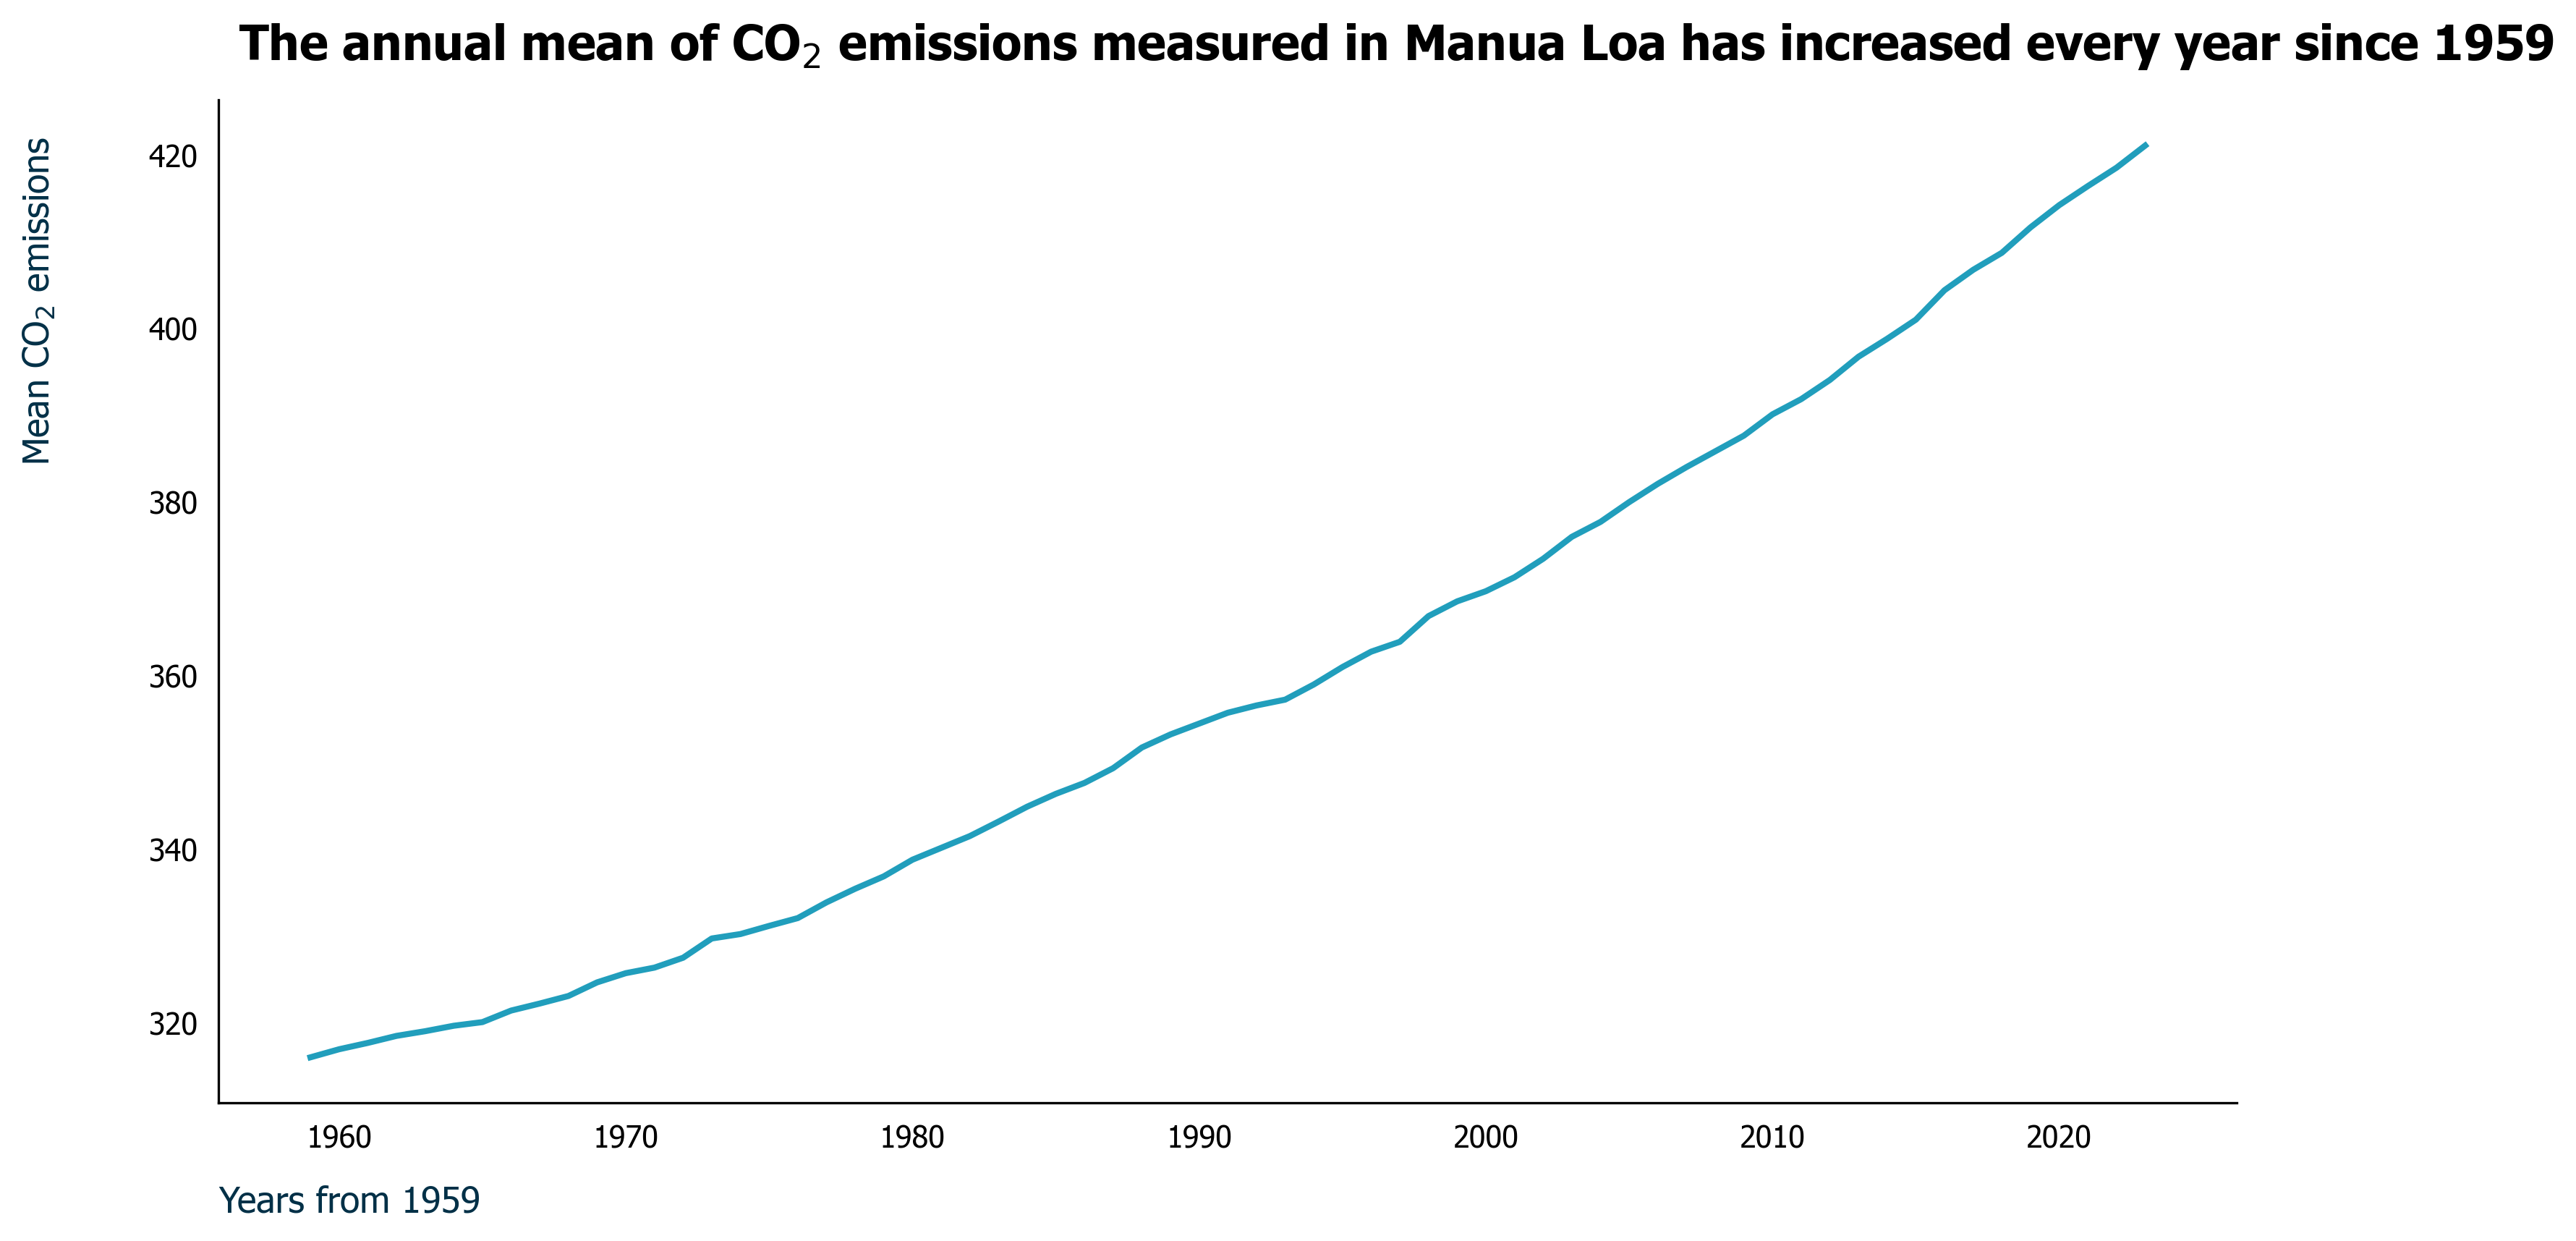

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

    # Plot the line
ax.plot(df.index, df["mean"], color="#219EBC", linewidth=2, label="Avg CO₂ emissions")

# Set the main title
ax.set_title(
    "The annual mean of CO$_2$ emissions measured in Manua Loa has increased every year since 1959",
    x=0.01,
    y=0.95,
    ha="left",
    fontsize=16,
    fontweight="bold",
    pad= 30
)

    # Axis labels
ax.set_xlabel("Years from 1959", loc="left", fontsize=12, color="#023047")
ax.set_ylabel("Mean CO$_2$ emissions", fontsize=12, color="#023047")
ax.yaxis.set_label_coords(-0.08, 0.8)
    

3. Exploring and explaining happiness

First graph

In [20]:
import pandas as pd
import duckdb
import openpyxl

df = pd.read_excel("data/happiness.xlsx")

df_happy = duckdb.query(
    """--sql
    SELECT "Explained by: Log GDP per capita", "Ladder score"
    FROM df
    ORDER BY "Ladder score" ASC
    """
).df()

# Here: set index on the already sorted df_happy, NOT df
df_happy = df_happy.set_index("Ladder score")

ax = df_happy["Explained by: Log GDP per capita"].plot()

ax


ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
df.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [ ]:
df_happy

,Explained by: Log GDP per capita
Ladder score,
1.7210,0.628138
2.7065,1.376726
3.1862,0.770807
3.2452,0.654278
3.2954,0.533670
...,...
7.3411,1.802934
7.3441,1.878146
7.5251,1.880718


Bad value in file 'styles/base_erik.mplstyle', line 30 ("axes.prop_cycle : cycler('color', ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)


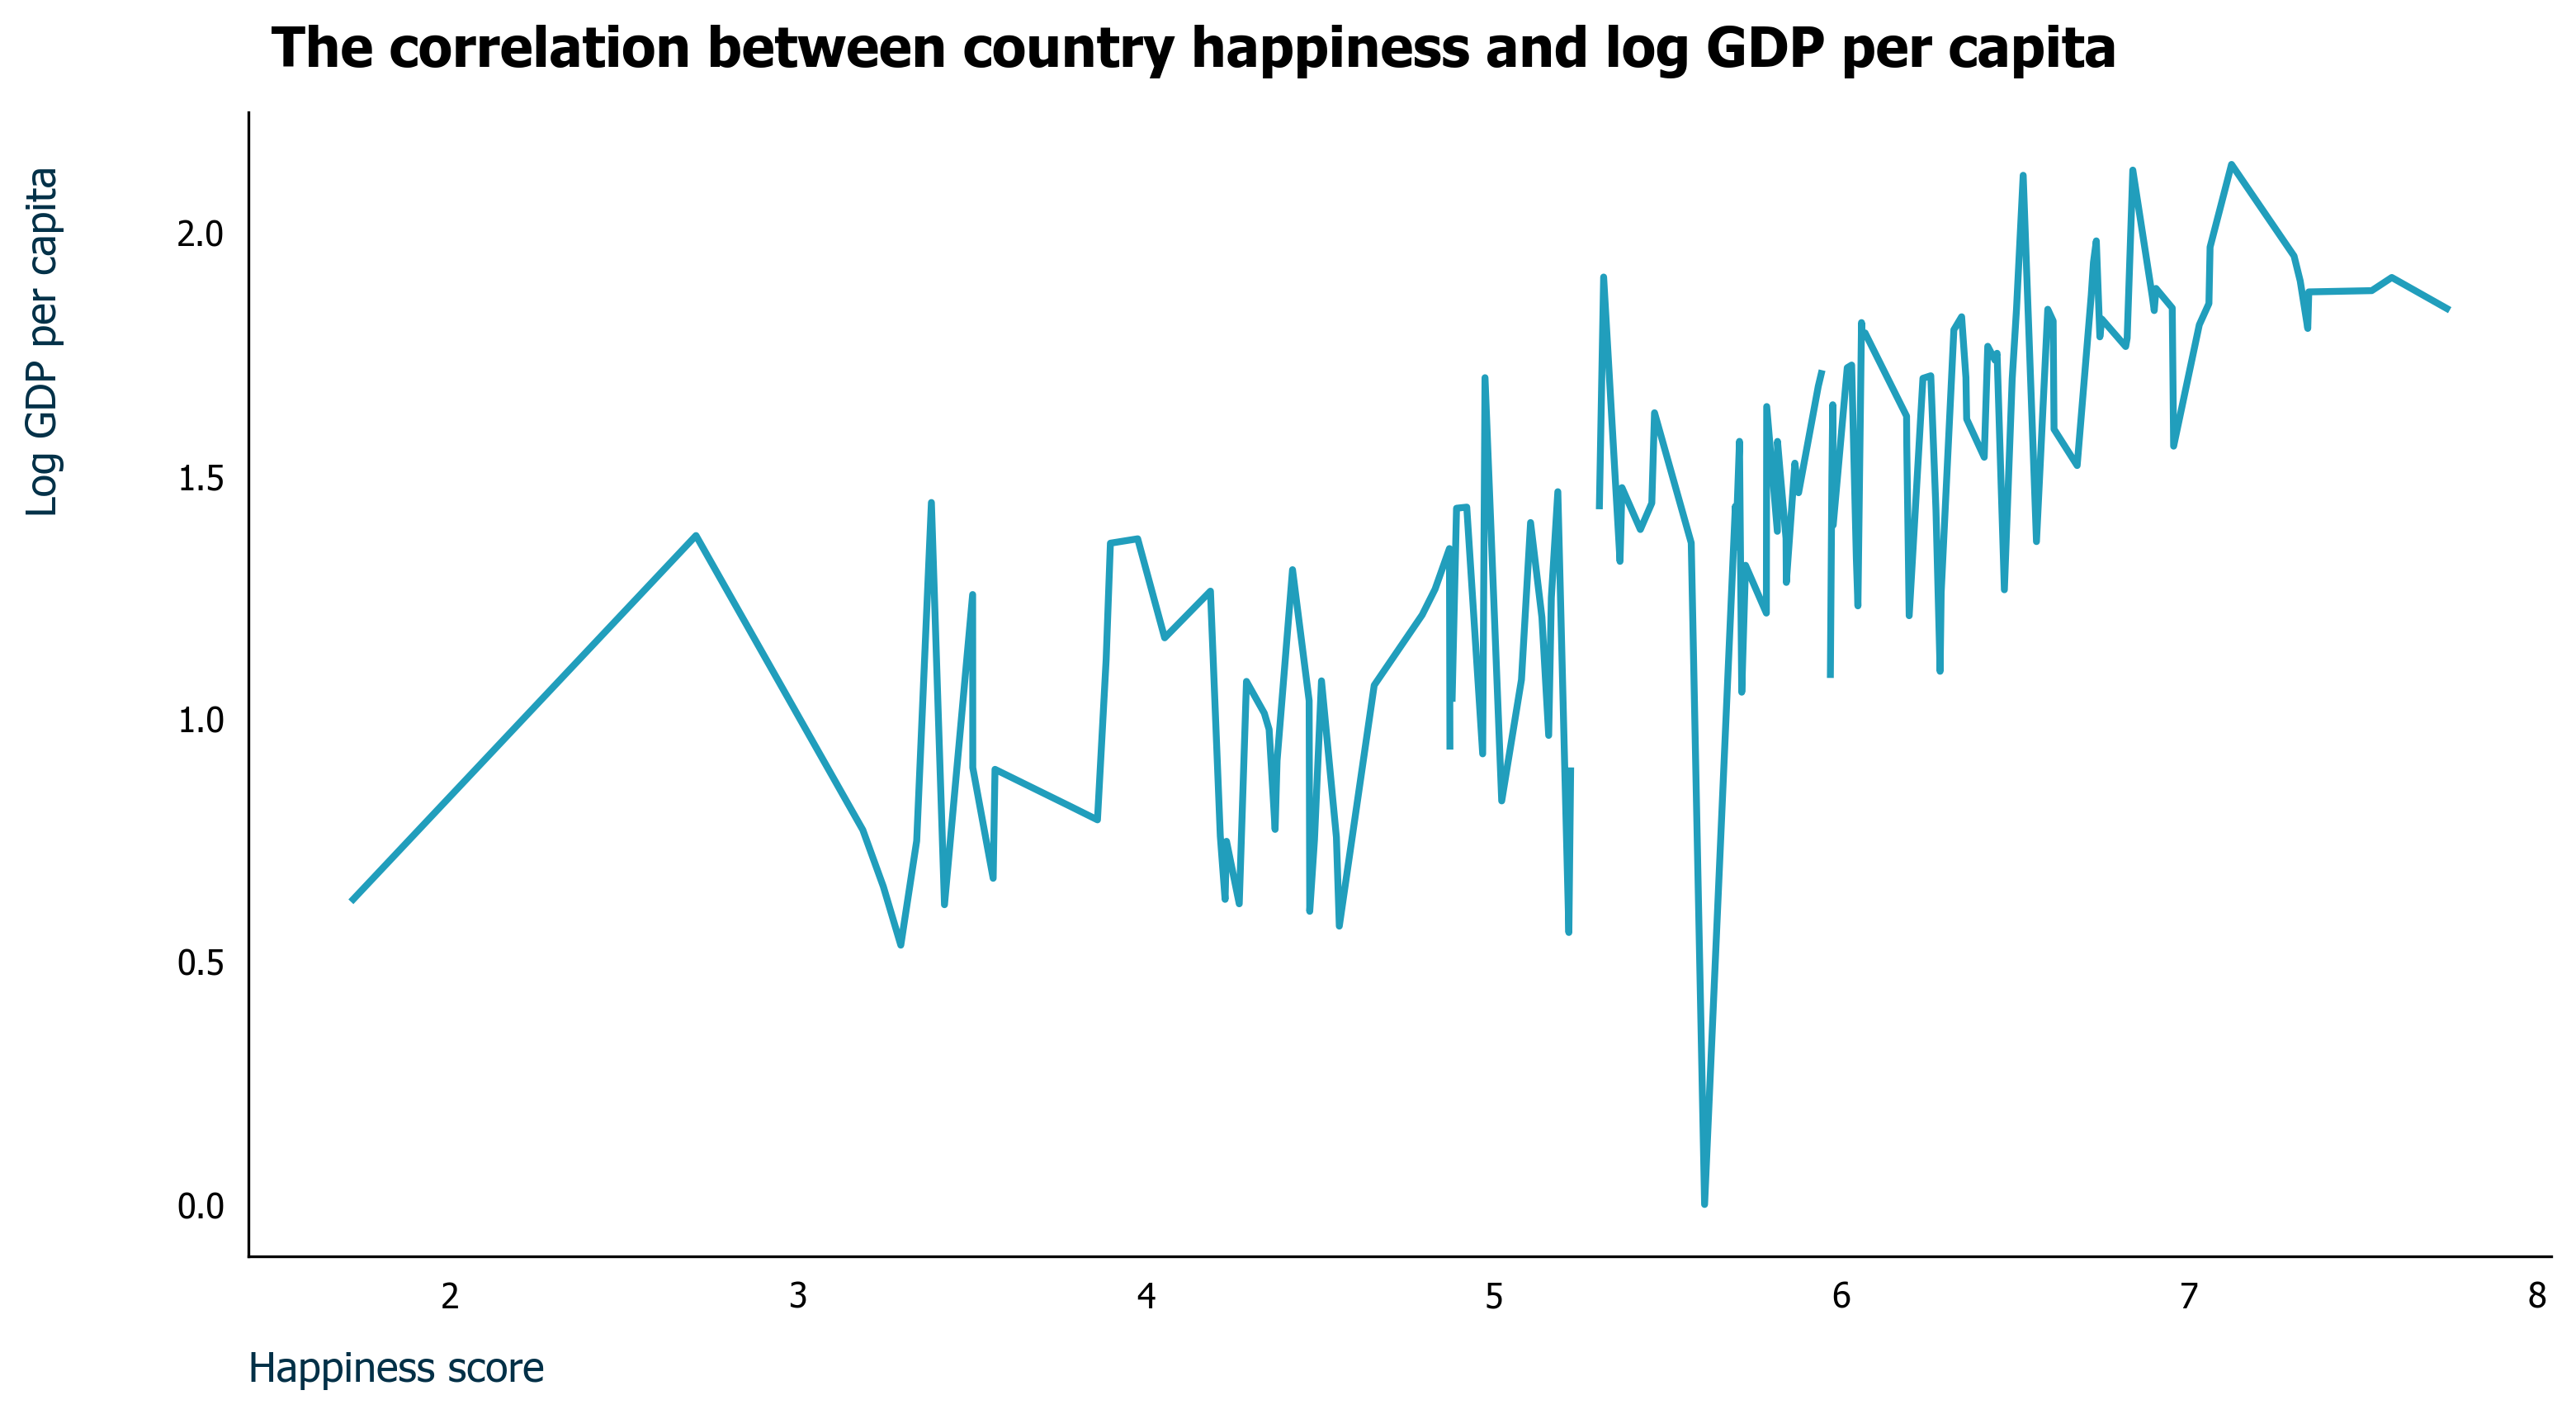

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("styles/base_erik.mplstyle")

fig, ax = plt.subplots(figsize=(12,6))

    # Plot the line
ax.plot(df_happy.index, df_happy["Explained by: Log GDP per capita"], color="#219EBC", linewidth=2)

# Set the main title
ax.set_title(
    "The correlation between country happiness and log GDP per capita",
    x=0.01,
    y=0.95,
    ha="left",
    fontsize=16,
    fontweight="bold",
    pad= 30
)

    # Axis labels
ax.set_xlabel("Happiness score", loc="left", fontsize=12, color="#023047")
ax.set_ylabel("Log GDP per capita", fontsize=12, color="#023047")
ax.yaxis.set_label_coords(-0.08, 0.8)

Second graph

In [ ]:
import pandas as pd
import duckdb
import openpyxl

df = pd.read_excel("data/happiness.xlsx")

df

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
2,Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
3,Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707
4,Israel,7.3411,7.405165,7.277036,1.802934,1.512793,0.739816,0.641463,0.153205,0.192823,2.298026
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.2954,3.462328,3.128472,0.533670,0.664700,0.261508,0.472705,0.188676,0.072167,1.102014
139,Sierra Leone,3.2452,3.366252,3.124148,0.654278,0.565977,0.253321,0.469035,0.181365,0.053299,1.067906
140,Lesotho,3.1862,3.468785,2.903615,0.770807,0.850587,0.000000,0.523188,0.082087,0.084969,0.874525
141,Lebanon,2.7065,2.796744,2.616256,1.376726,0.576713,0.556247,0.173223,0.067641,0.028772,-0.072831


In [ ]:
import duckdb 

df_happy = duckdb.query(
    """--sql
    SELECT 
       "Explained by: Healthy life expectancy", "Ladder score"
    FROM df
    ORDER BY "Ladder score" ASC
    
    """
).df()

df_happy

,Explained by: Healthy life expectancy,Ladder score
0,0.241763,1.7210
1,0.556247,2.7065
2,0.000000,3.1862
3,0.253321,3.2452
4,0.261508,3.2954
...,...,...
138,0.739816,7.3411
139,0.723871,7.3441
140,0.718345,7.5251
141,0.698944,7.5827


Bad value in file 'styles/base_erik.mplstyle', line 30 ("axes.prop_cycle : cycler('color', ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)


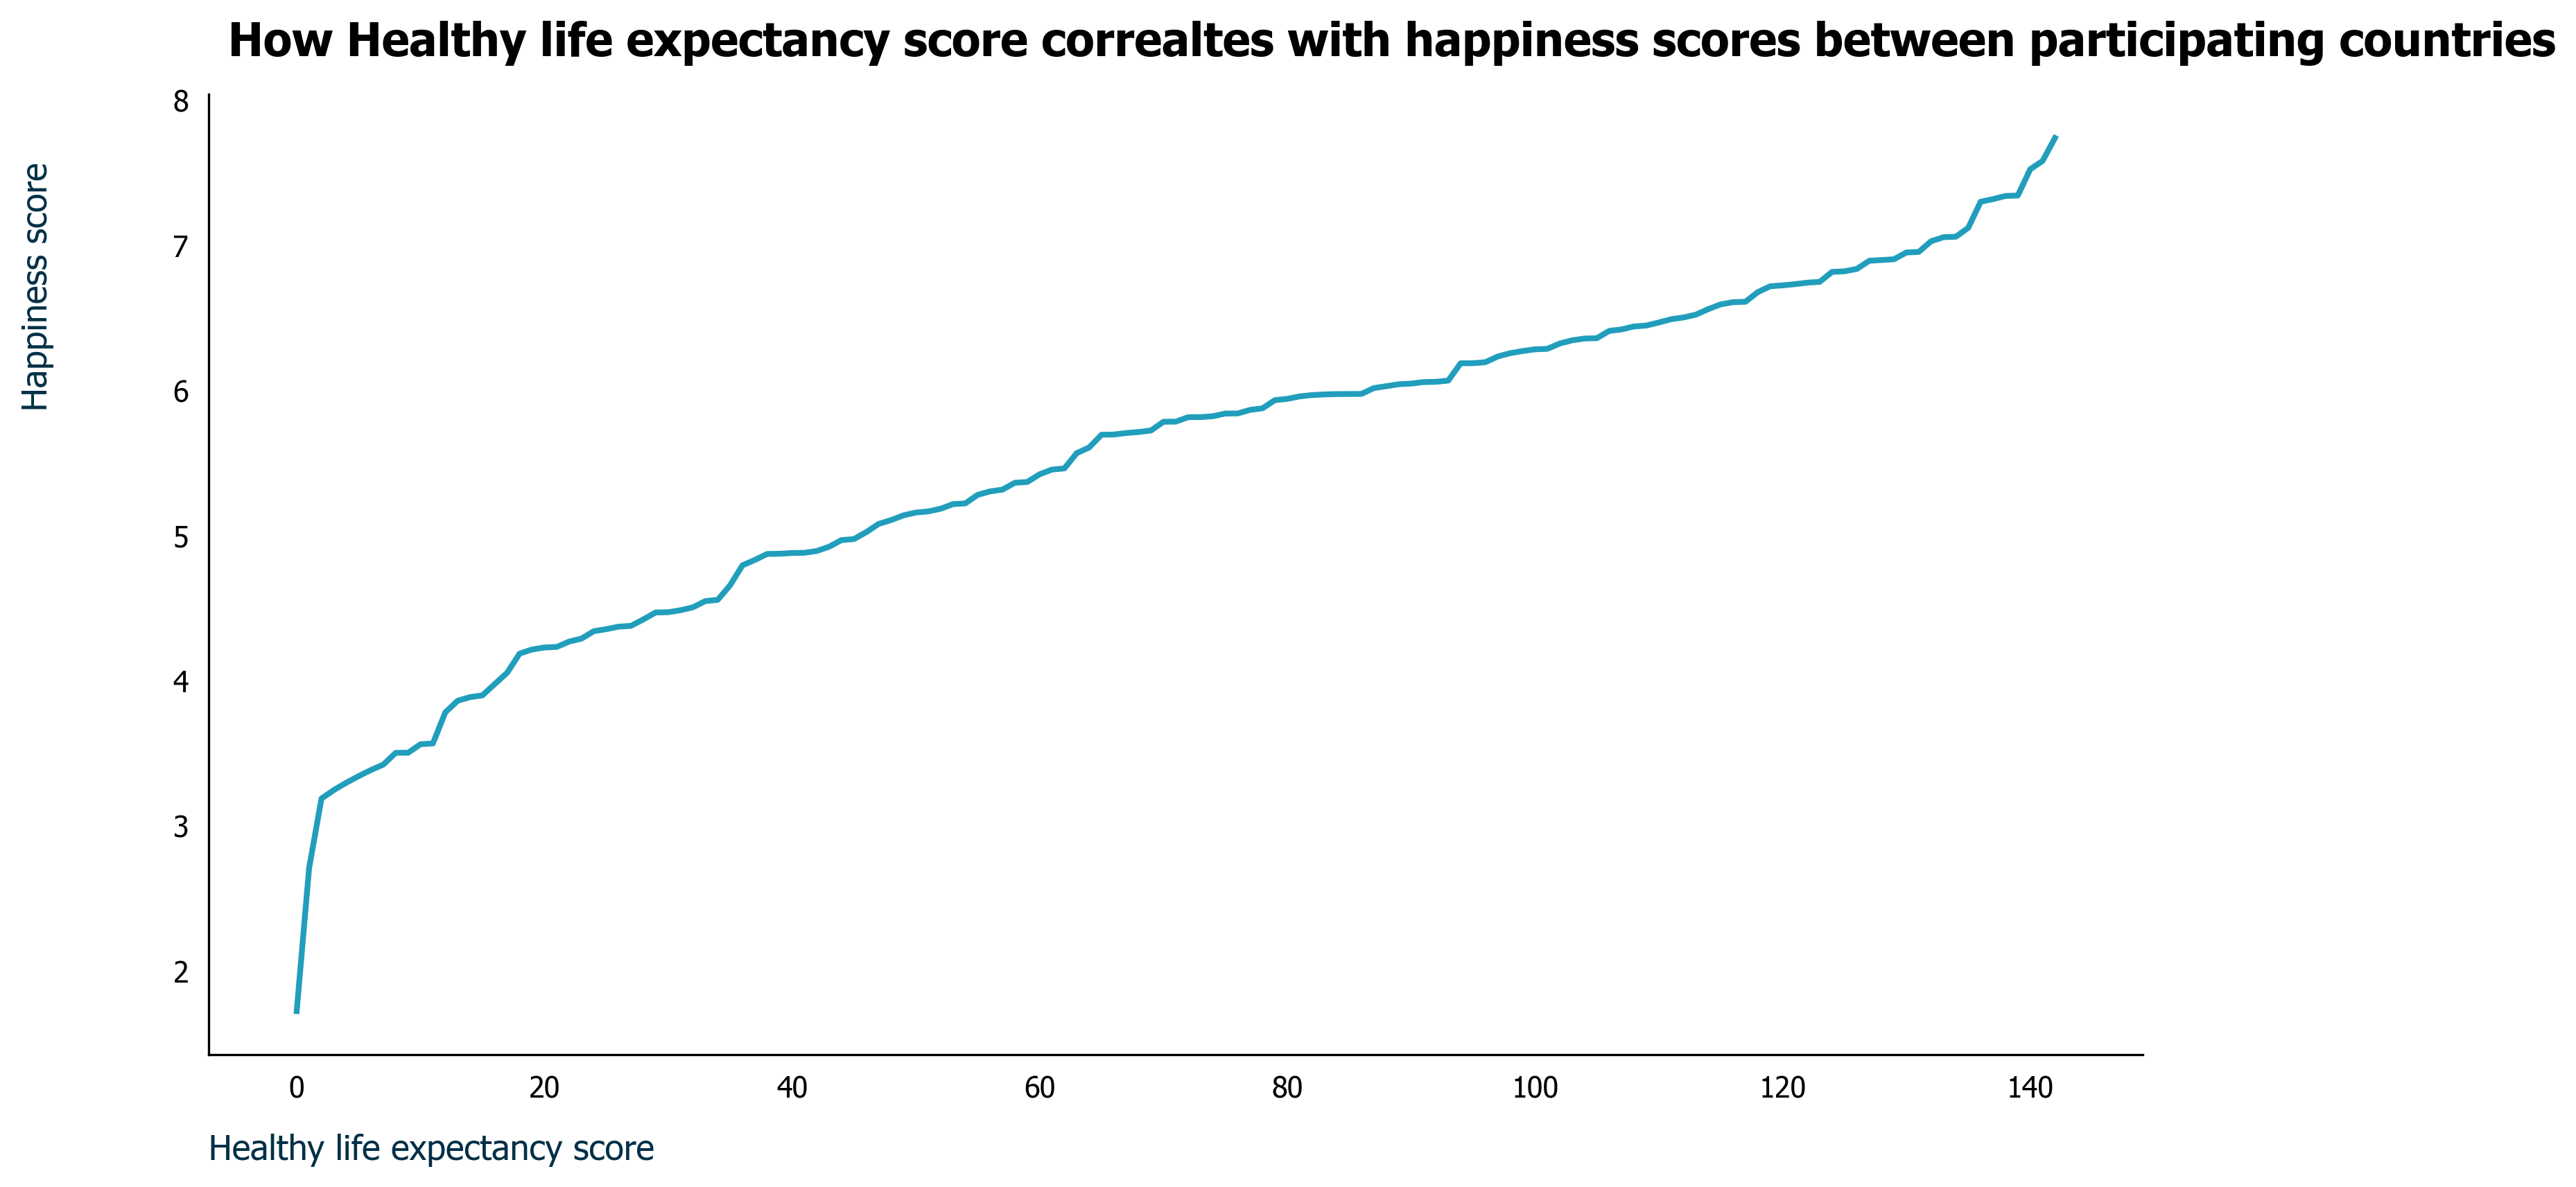

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("styles/base_erik.mplstyle")

fig, ax = plt.subplots(figsize=(12,6))

    # Plot the line
ax.plot(df_happy.index, df_happy["Ladder score"], color="#219EBC", linewidth=2)

# Set the main title
ax.set_title(
    "How Healthy life expectancy score correaltes with happiness scores between participating countries",
    x=0.01,
    y=0.95,
    ha="left",
    fontsize=16,
    fontweight="bold",
    pad= 30
)

    # Axis labels
ax.set_xlabel("Healthy life expectancy score", loc="left", fontsize=12, color="#023047")
ax.set_ylabel("Happiness score", fontsize=12, color="#023047")
ax.yaxis.set_label_coords(-0.08, 0.8)

Graph 3

In [ ]:
import duckdb 

df_happy = duckdb.query(
    """--sql
   SELECT 
    "Country name", "Ladder score"
FROM df
ORDER BY "Ladder score" ASC
LIMIT 10
    
    """
).df()

df_happy


,Country name,Ladder score
0,Afghanistan,1.7210
1,Lebanon,2.7065
2,Lesotho,3.1862
3,Sierra Leone,3.2452
4,Congo (Kinshasa),3.2954
5,Zimbabwe,3.3411
6,Botswana,3.3834
7,Malawi,3.4210
8,Eswatini,3.5020
9,Zambia,3.5024


Bad value in file 'styles/base_erik.mplstyle', line 30 ("axes.prop_cycle : cycler('color', ['#8ECAE6', '#219EBC', '#023047', '#FFB703', '#FB8500'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)
C:\Users\eriku\AppData\Local\Temp\ipykernel_18164\3046400064.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


<Axes: xlabel='Country', ylabel='Happiness score'>

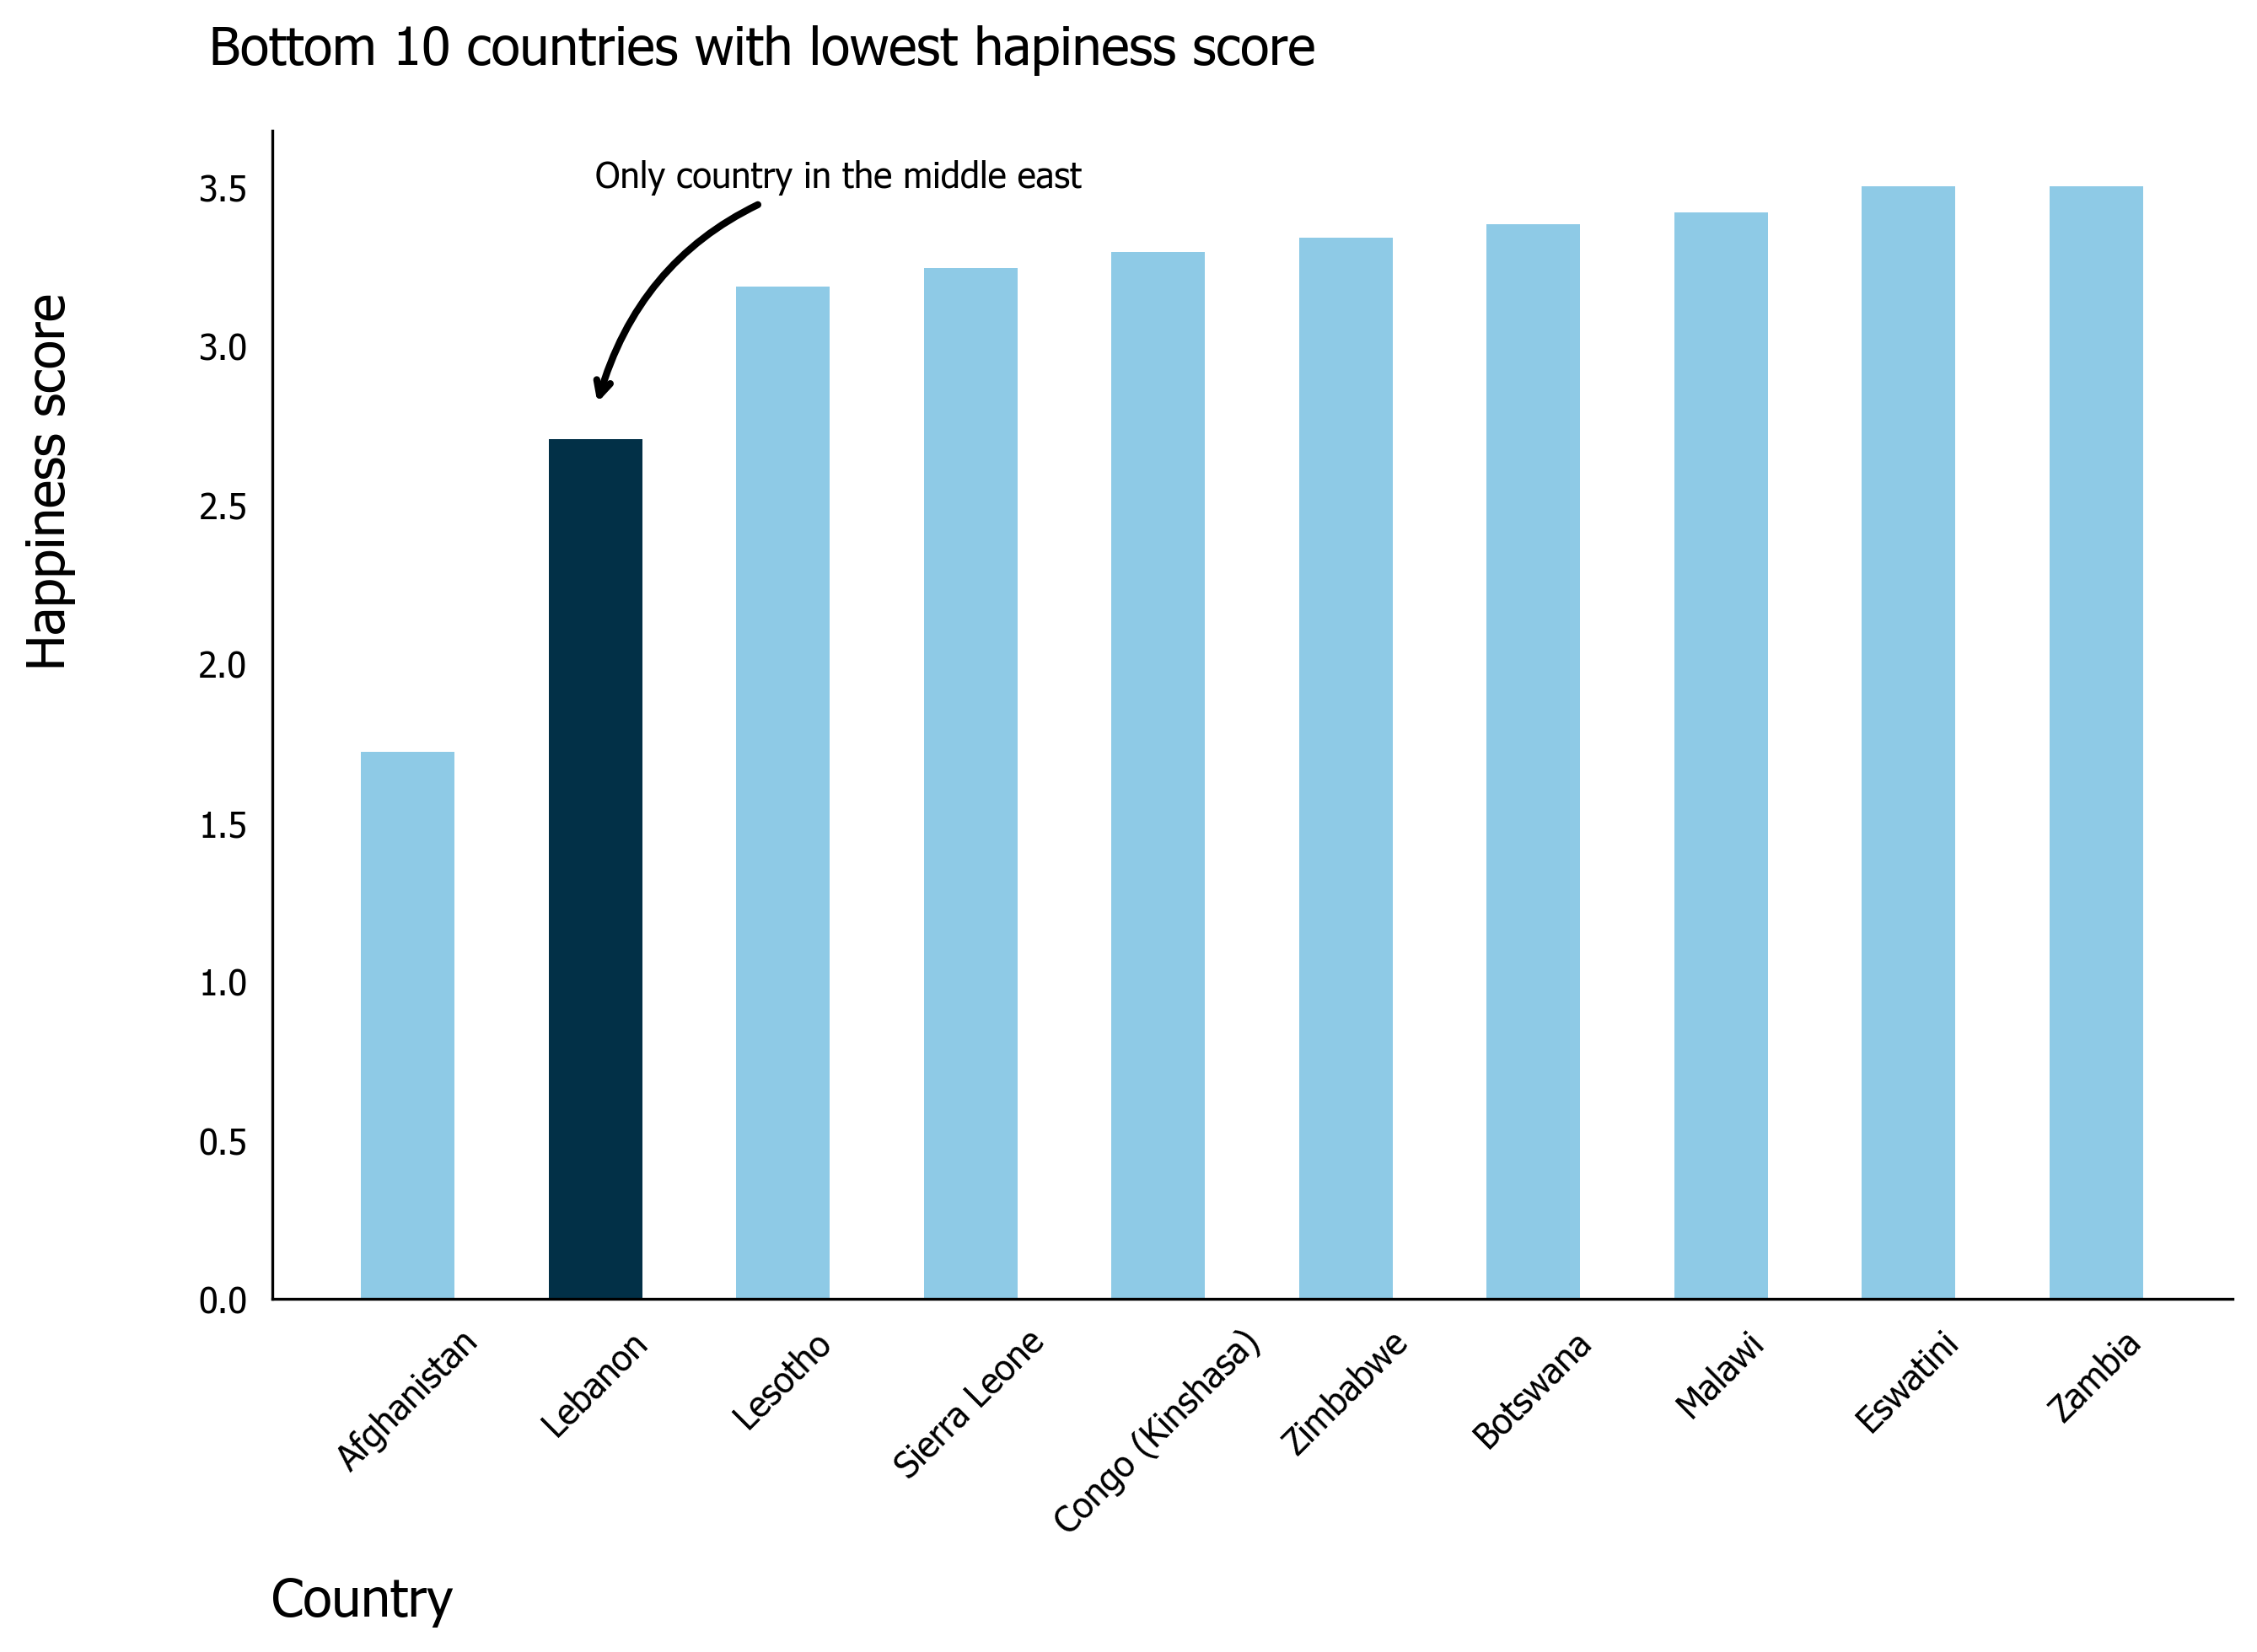

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("styles/base_erik.mplstyle")

custom_colors = ["#8ECAE6"]*len(df_happy)
custom_colors[1] = "#023047"

df_happy = df_happy.set_index("Country name")

def happy_plot():
    fig, ax = plt.subplots() 
    
    # För att få bredden mellan pelarna
    x = np.arange(len(df_happy)) * 0.8

    ax.bar(x, df_happy["Ladder score"], width=0.4, color=custom_colors)

    ax.set_xticks(x)
    ax.set_xticklabels(df_happy.index, rotation=45)

    fig.suptitle(
        "Bottom 10 countries with lowest hapiness score",
        x=0.1,
        y=0.95,
        ha="left",
        fontsize=15, 
    )

    ax.set_xlabel("Country", loc="left")
    ax.set_ylabel("Happiness score")
    ax.yaxis.set_label_coords(-0.1, 0.7)

    ax.legend().remove()
    
        
    arrowprops = dict(arrowstyle= "->", connectionstyle="arc3, rad=0.3", linewidth=2)
    ax.annotate(
    text="Only country in the middle east", 
    xy=(0.8, 2.8), # ger pilen
    arrowprops=arrowprops, 
    xytext=(0.8, 3.5), # ger texten
    fontsize=10
    )


    return ax

ax = happy_plot()
ax

#4) Theory questions

  a) Why is it good to use the proximity principle when designing visuals?

  In visuals like charts, graphs, or dashboards, this is important because:
  It helps the reader immediately group related information.
  It reduces confusion and makes the story clear without needing extra labels.
  It guides the eyes naturally through the visual in a logical way.
  It makes complex data easier to understand because your brain groups things automatically.

  b) What is clutter and why is it undesirable?

  Clutter means having too much unnecessary information in a visual, like extra labels, colors, or decorations.
  It makes it harder for the viewer to quickly understand the main point.
  Clutter distracts attention away from the important message you want to communicate.
  It can also overwhelm the viewer and slow down how fast they can read the chart.
  A clean, simple visual is more effective because it guides the eye directly to what matters.

c) Why should you spend time on data storytelling when there is a lot of things that needs to be explored and cleaned in the data?

Data storytelling turns complex analysis into clear, meaningful insights that people can understand.
Even if the data needs cleaning and exploration, the final goal is always to communicate findings effectively.
Without storytelling, important patterns or discoveries might get lost or ignored.
Good storytelling helps engage the audience and drives better decisions based on the data.
It ensures that all the hard work cleaning and analyzing the data actually makes an impact.

d) Data storytelling is very subjective in terms of which story to tell. How could you or your team craft a compelling story to tell?

To craft a compelling data story, you should first understand your audience and what matters most to them.
Focus on a single, clear message instead of trying to tell everything at once.
Use visuals and examples that directly support the key point you want to highlight.
Keep the story structured: start with context, show the main insight, and end with why it matters.
Finally, test the story by sharing it with a small group first and adjust based on their feedback for clarity and impact.






  

#Glossary

Fill in this table either by copying this into your own markdown file or copy it into a spreadsheet if you feel that is easier to work with.

| Terminology               | Explanation |
|----------------------------|-------------|
| Exploratory data analysis  | Exploring and investigating data to discover patterns, trends, or anomalies without a specific question in mind. |
| Explanatory data analysis  | Analyzing data with the purpose of explaining a specific insight or answer to a defined question. |
| Clutter                    | Unnecessary elements in a visual that distract from the main message and confuse the viewer. |
| Proximity principle        | Placing related elements close together to help the viewer immediately understand connections. |
| Attention                  | Designing visuals to guide the viewer’s focus to the most important parts. |
| Contrast                   | Using differences in color, size, or shape to highlight key information. |
| Colors sparingly           | Using a limited color palette to keep visuals clean and emphasize the most important elements. |
| Data storytelling          | Structuring data insights into a meaningful, engaging narrative that drives understanding and action. |
| Grid                       | Horizontal and vertical lines that help align elements or values in a graph, but should be used minimally. |
| Axis                       | The horizontal (x-axis) and vertical (y-axis) reference lines in a graph that show data scale and labels. |
| Insight                    | A clear and valuable understanding discovered from analyzing the data. |
| Context                    | Background information that helps the viewer understand why the data matters. |
| Call to action             | A suggestion or direction you want the audience to take after seeing the data story. |
| Annotation                 | Notes, arrows, or labels added to a visual to explain or highlight important points. |
| KPI                        | Key Performance Indicator — a measurable value that shows how effectively a goal is being achieved. |
| Story arc                  | The structure of a data story, usually with a beginning (context), middle (insight), and end (action). |
| Data literacy              | The ability to read, understand, and communicate data clearly and accurately. |
| Dashboard fatigue          | When users get overwhelmed or bored by too many dashboards, leading to lower engagement and understanding. |
